<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module_5_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import math

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

## Regression Lab 1: Linear Regression, MSE and Polynomial Regression

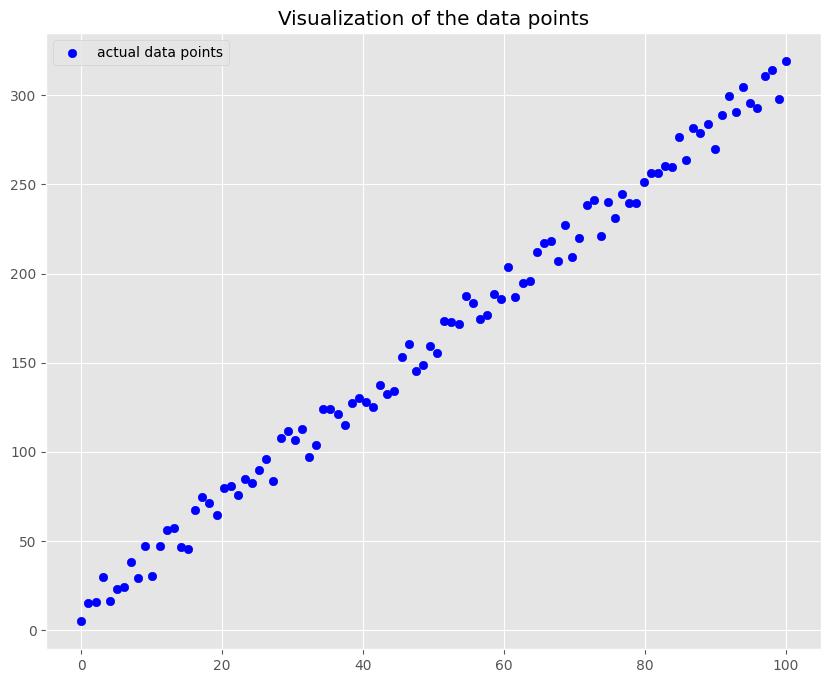

In [2]:
np.random.seed(22)

x = np.linspace(0,100,100).reshape((-1,1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x

plt.title("Visualization of the data points")
plt.scatter(x,y,color="blue")
plt.legend(["actual data points"])
plt.show()

## Brute-force solution

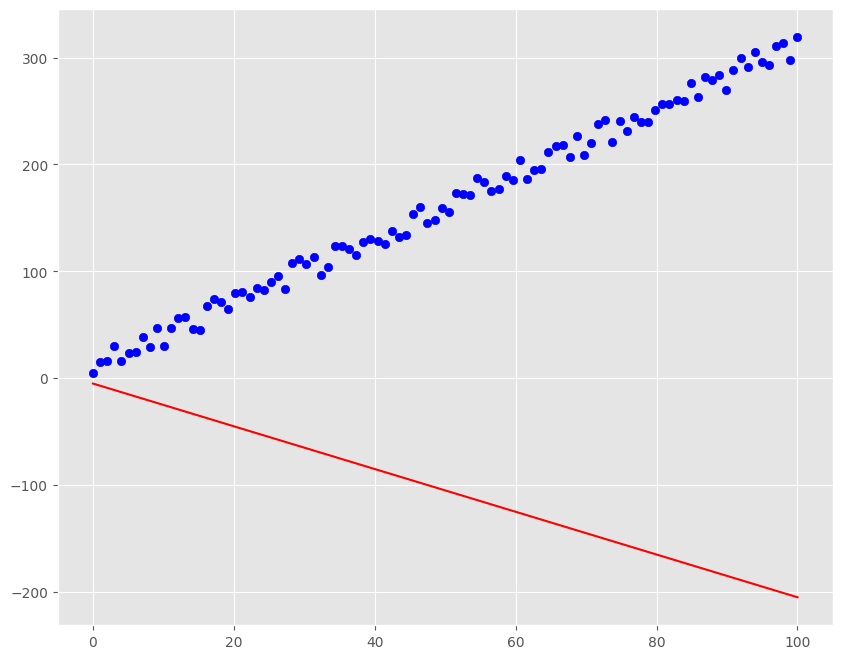

Average distance: 266.95



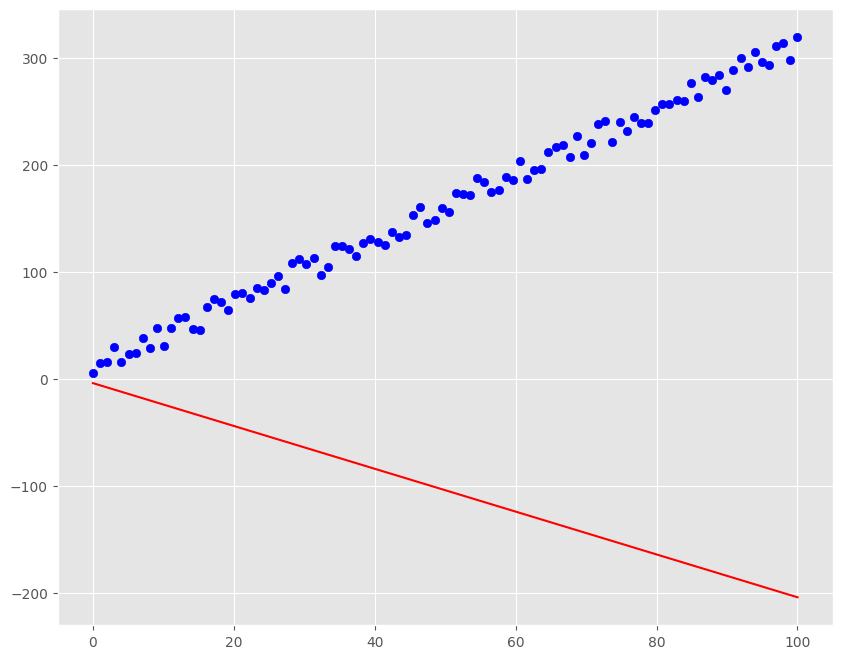

Average distance: 265.95



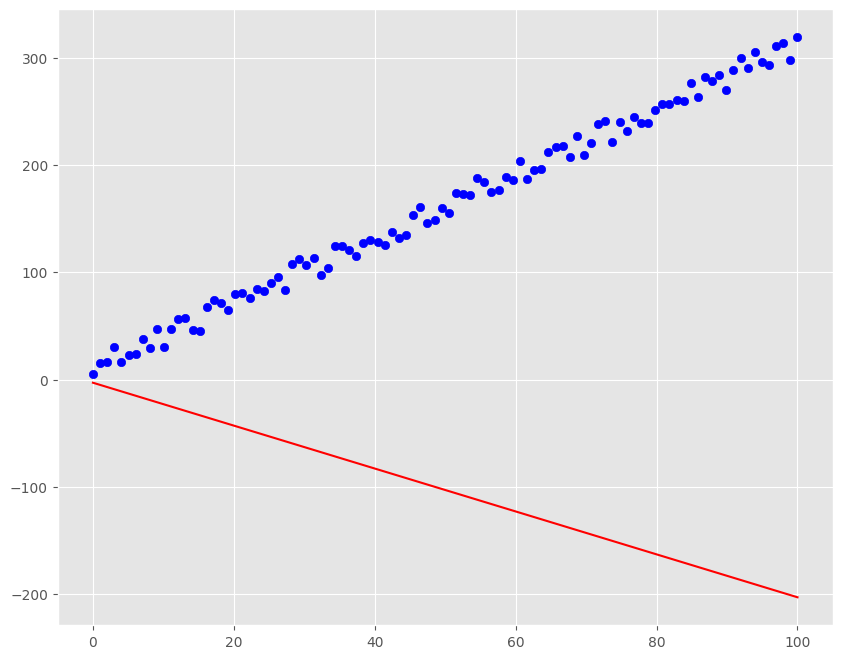

Average distance: 264.95



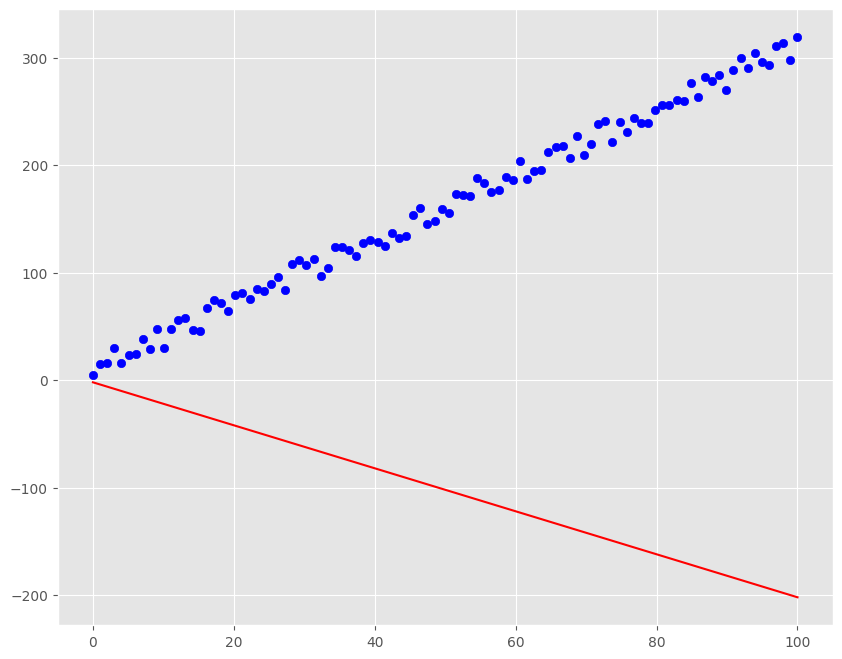

Average distance: 263.95



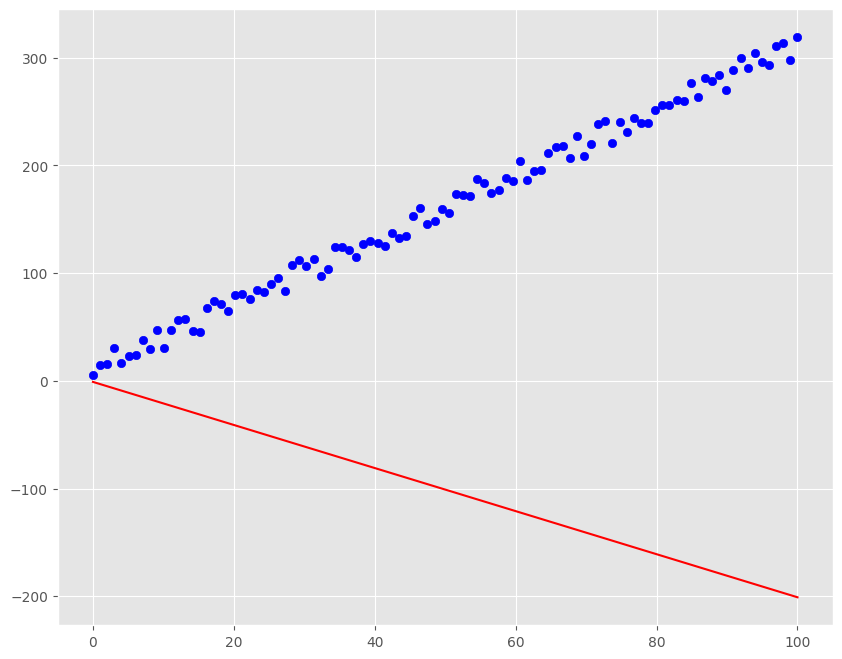

Average distance: 262.95



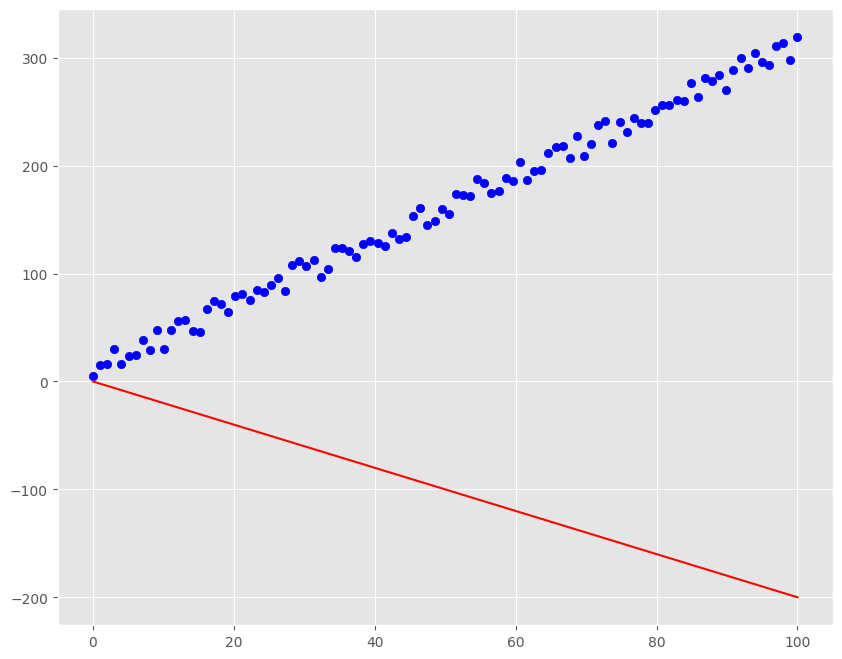

Average distance: 261.95



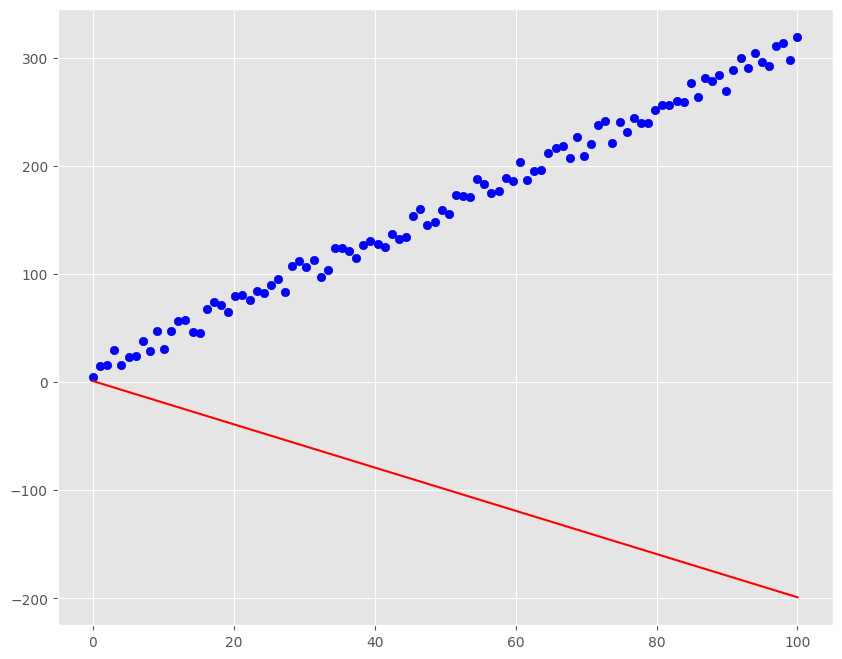

Average distance: 260.95



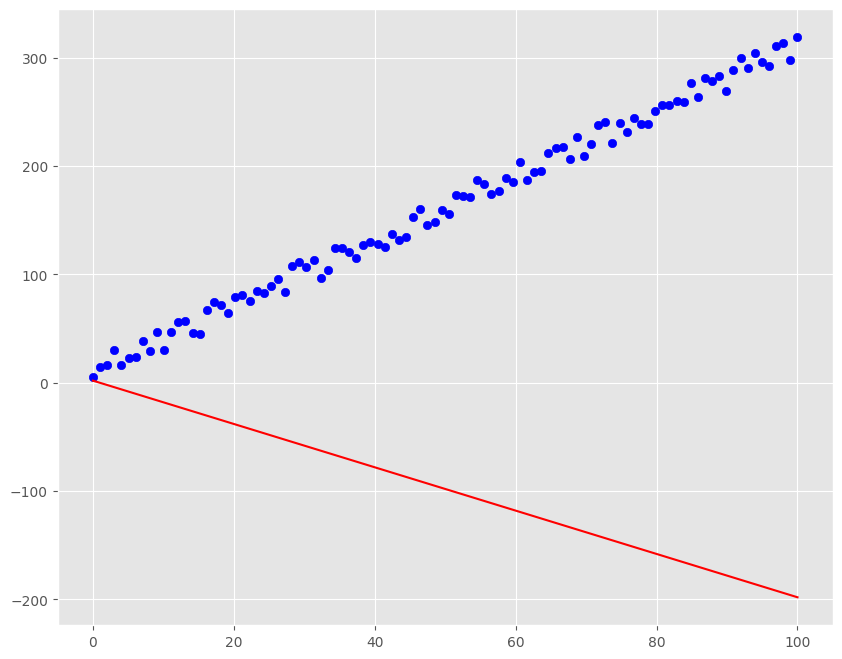

Average distance: 259.95



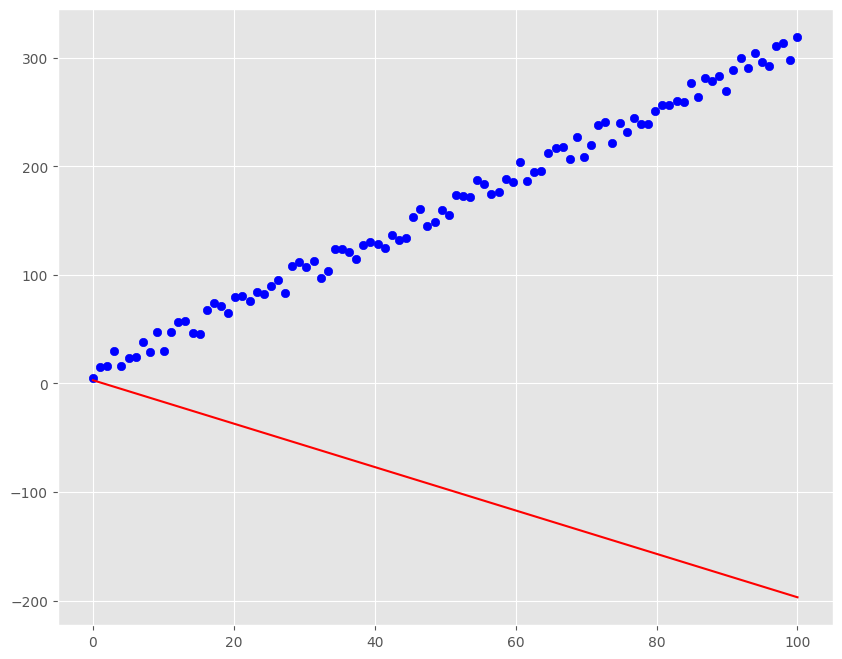

Average distance: 258.95



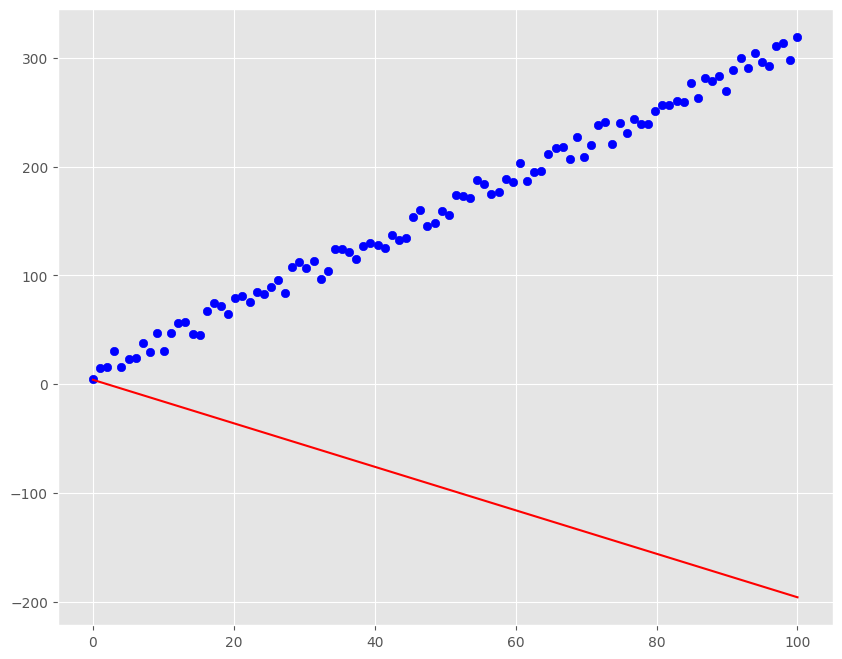

Average distance: 257.95



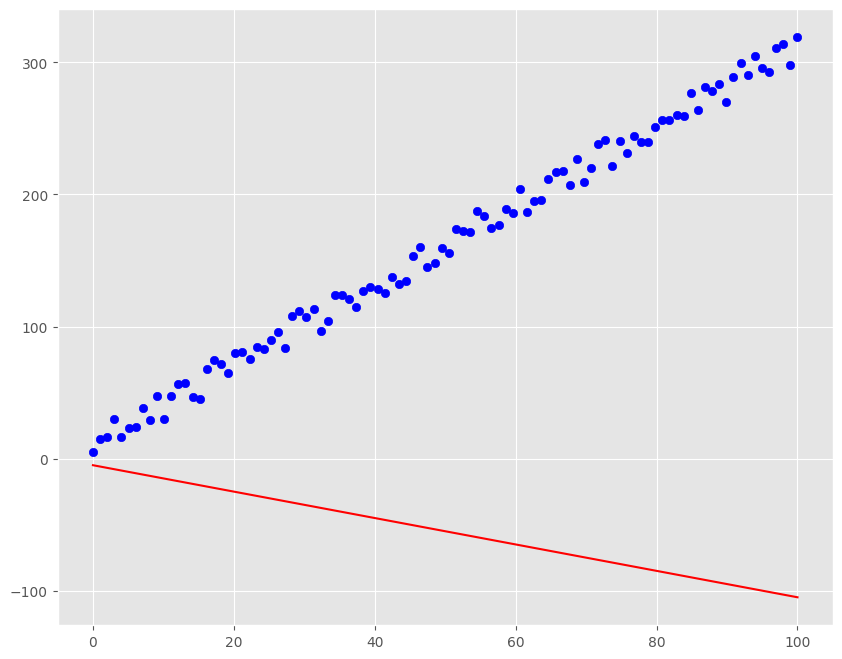

Average distance: 216.95000000000005



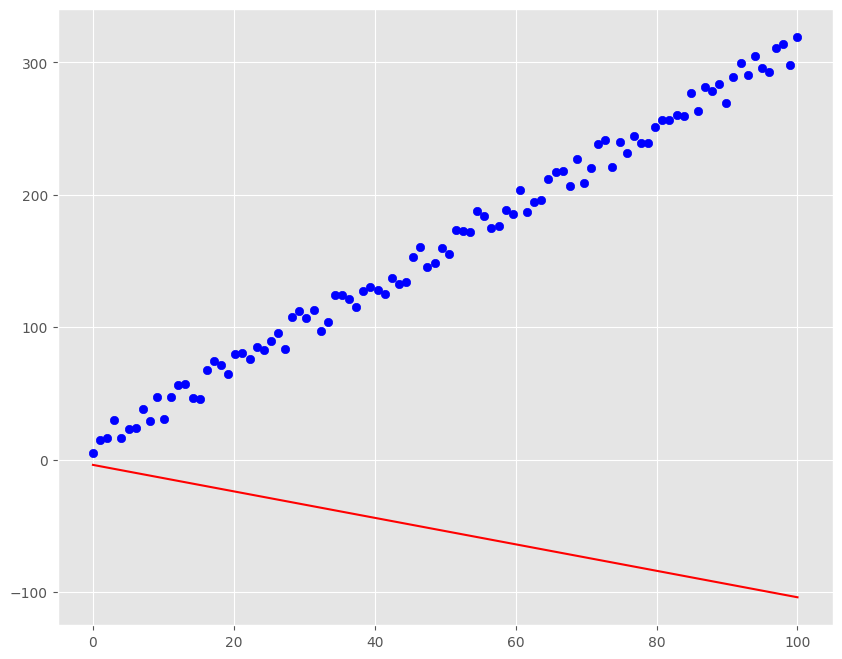

Average distance: 215.95000000000005



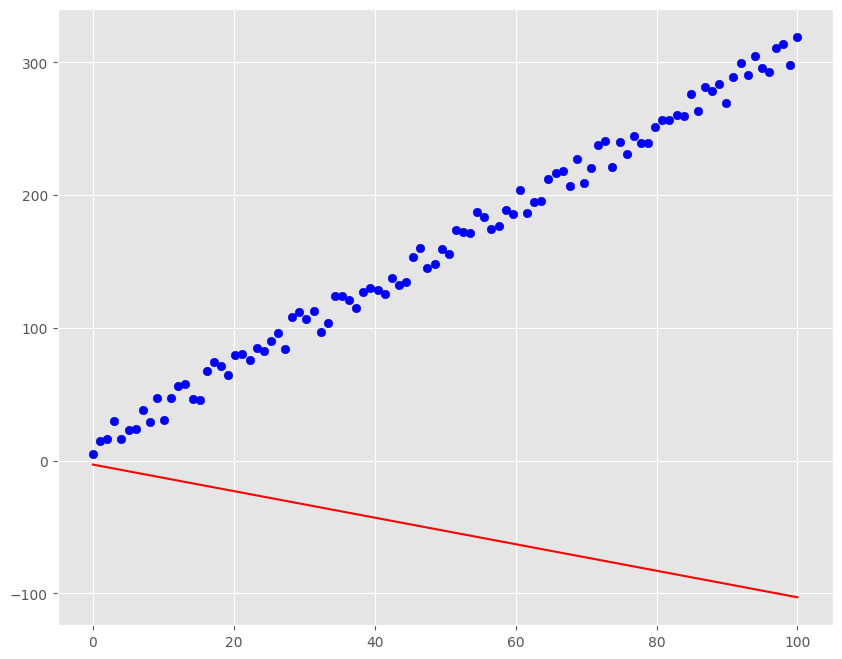

Average distance: 214.95000000000005



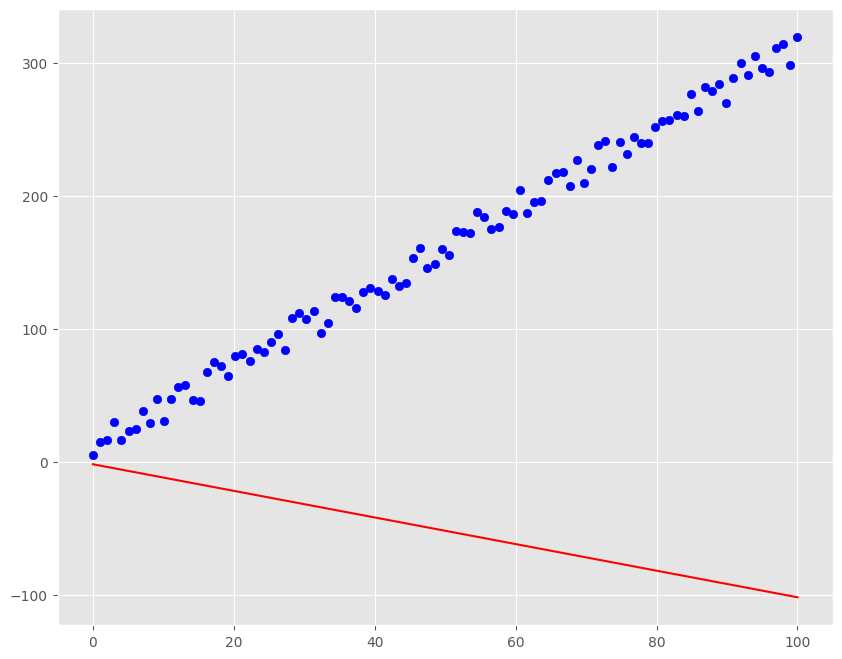

Average distance: 213.95000000000005



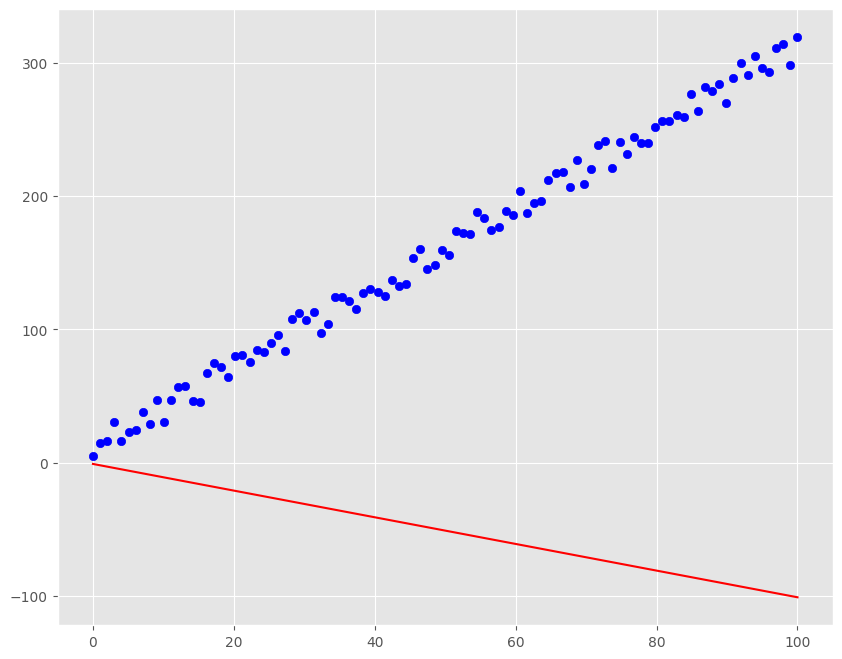

Average distance: 212.95000000000005



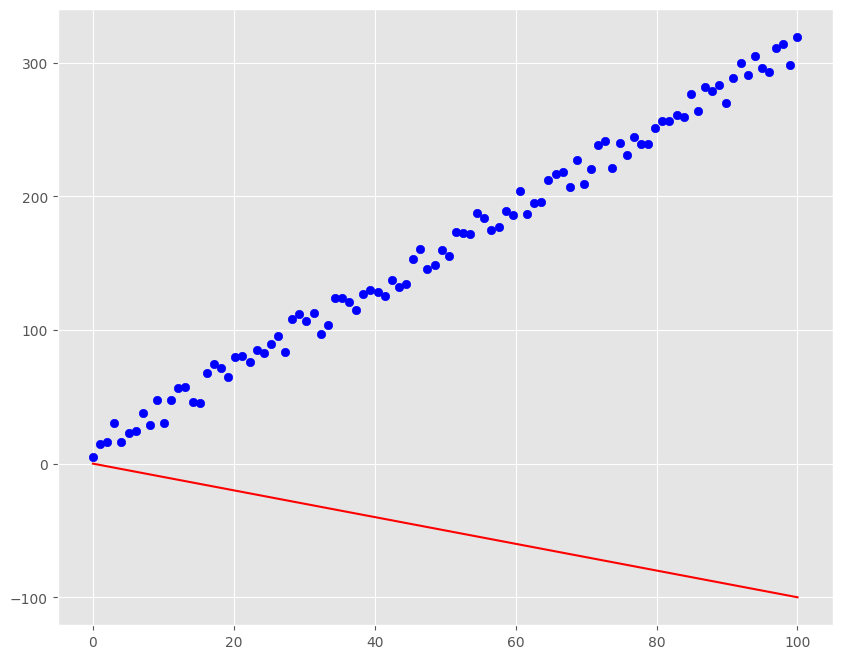

Average distance: 211.95000000000005



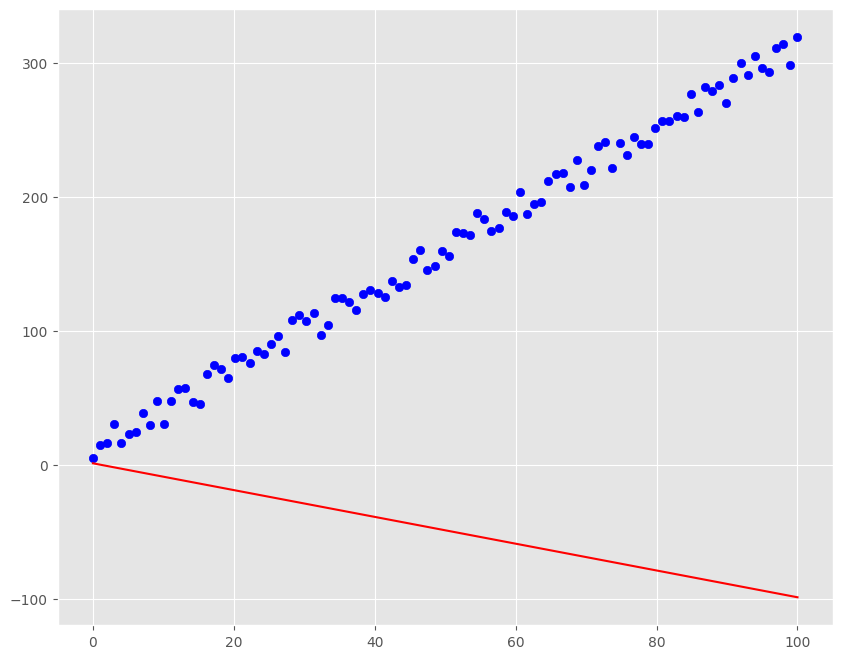

Average distance: 210.95000000000005



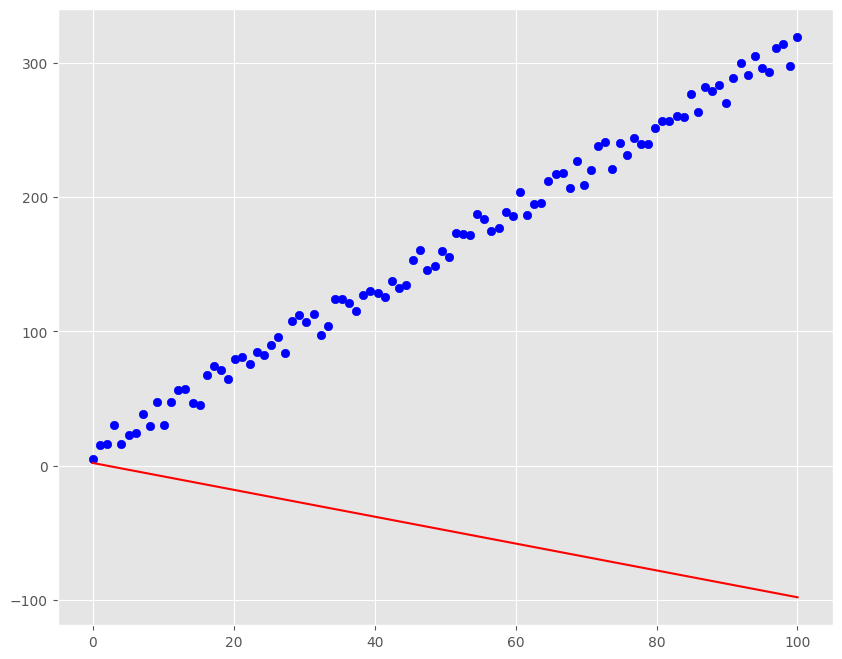

Average distance: 209.95000000000005



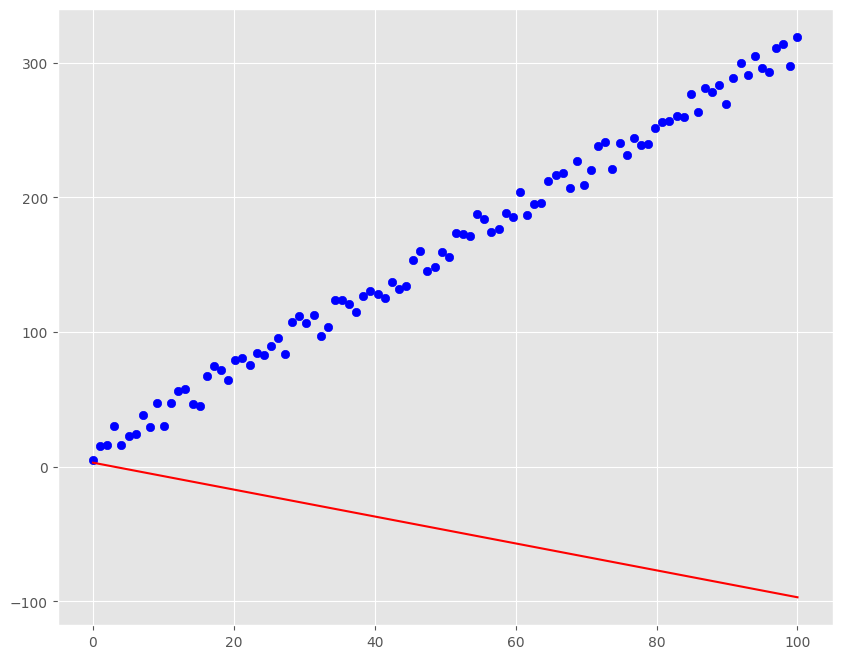

Average distance: 208.95000000000005



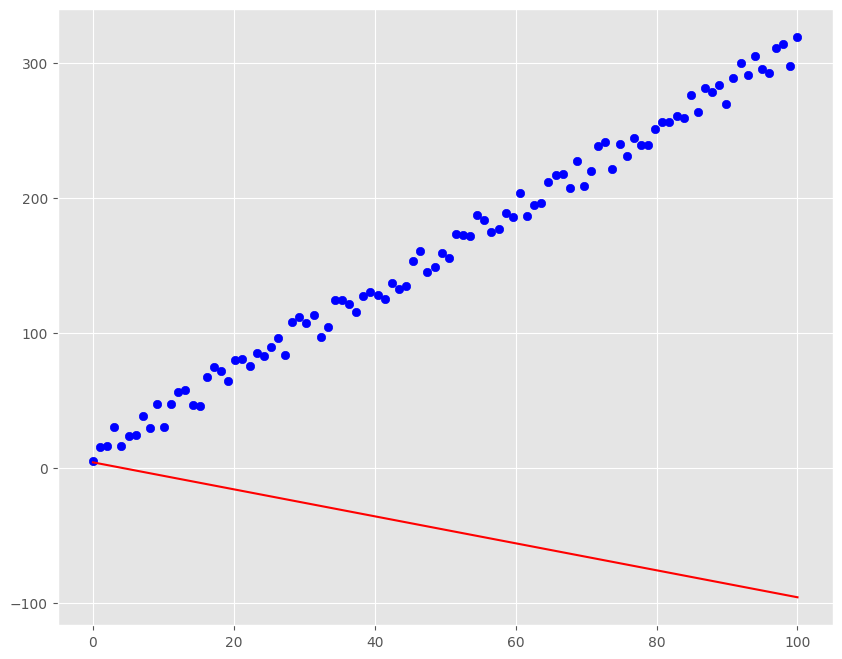

Average distance: 207.95000000000005



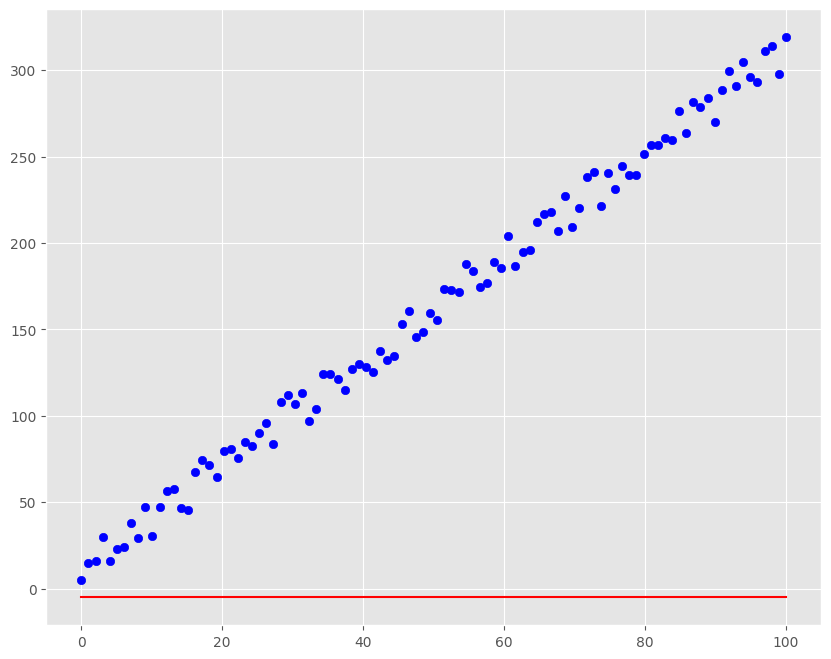

Average distance: 166.95



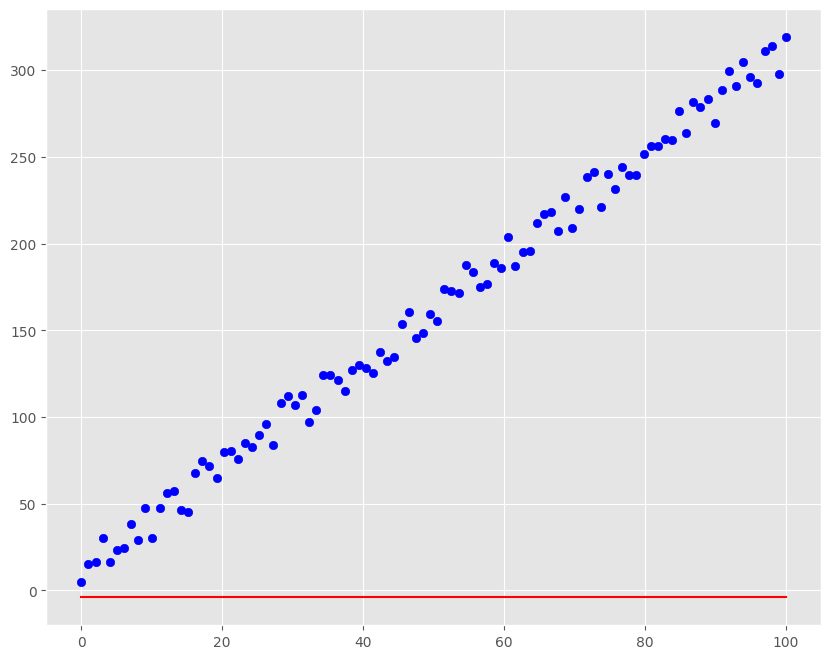

Average distance: 165.95



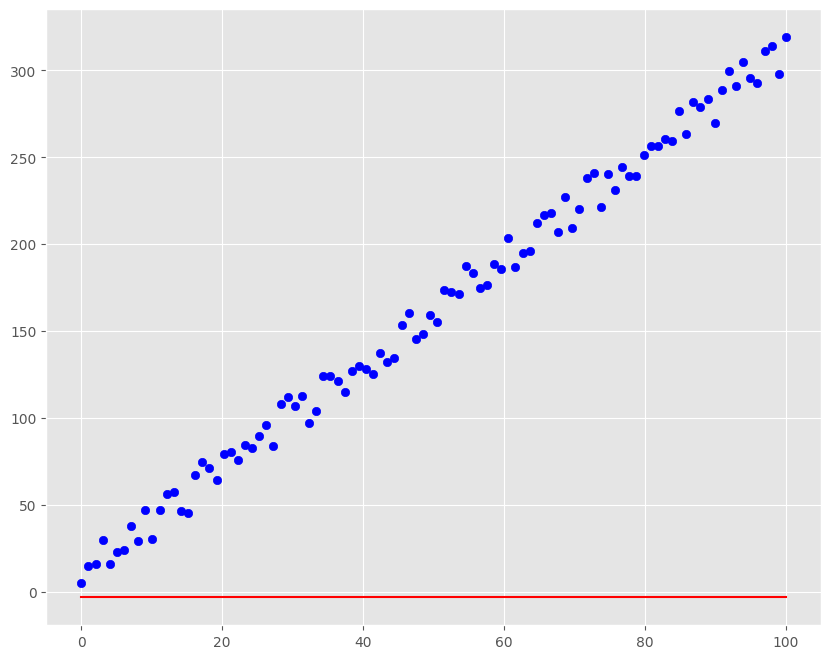

Average distance: 164.95



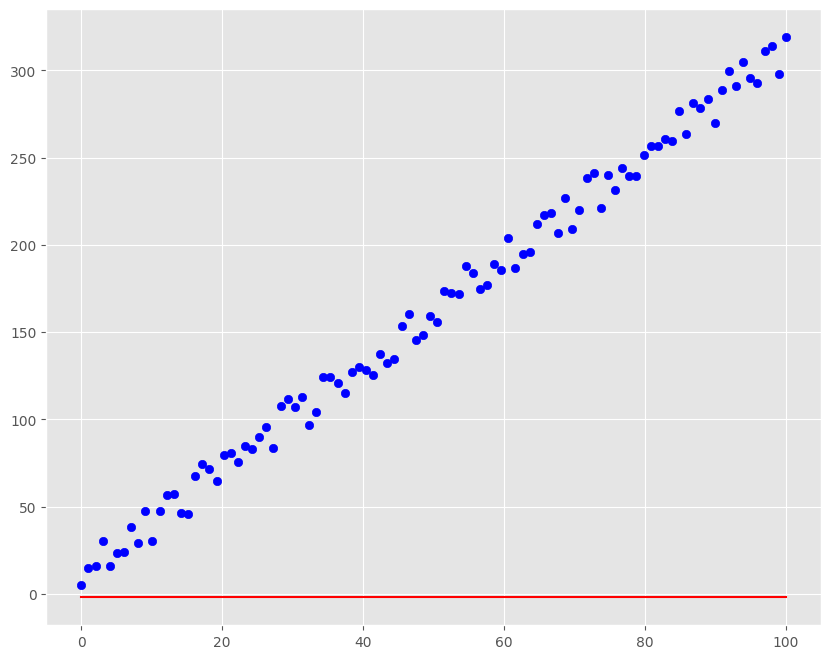

Average distance: 163.95



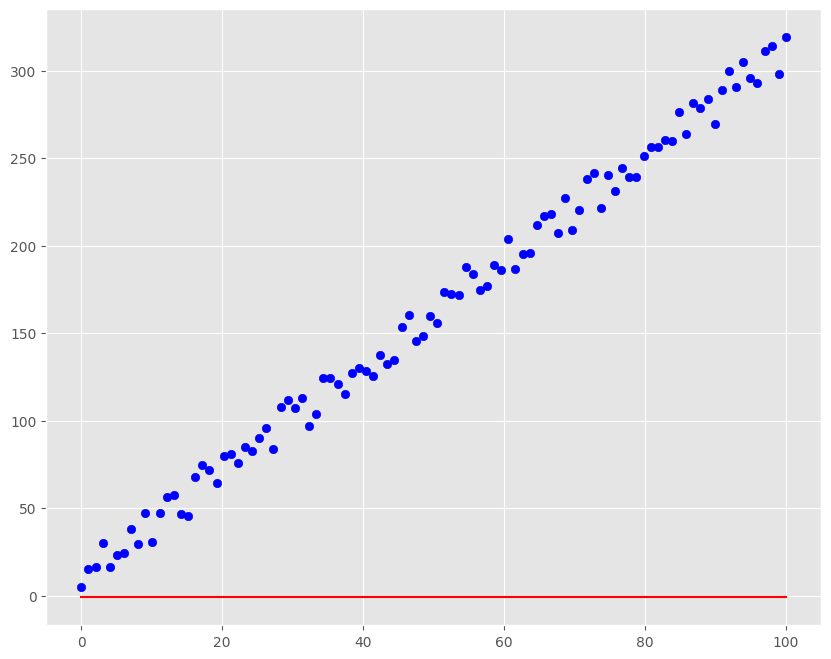

Average distance: 162.95



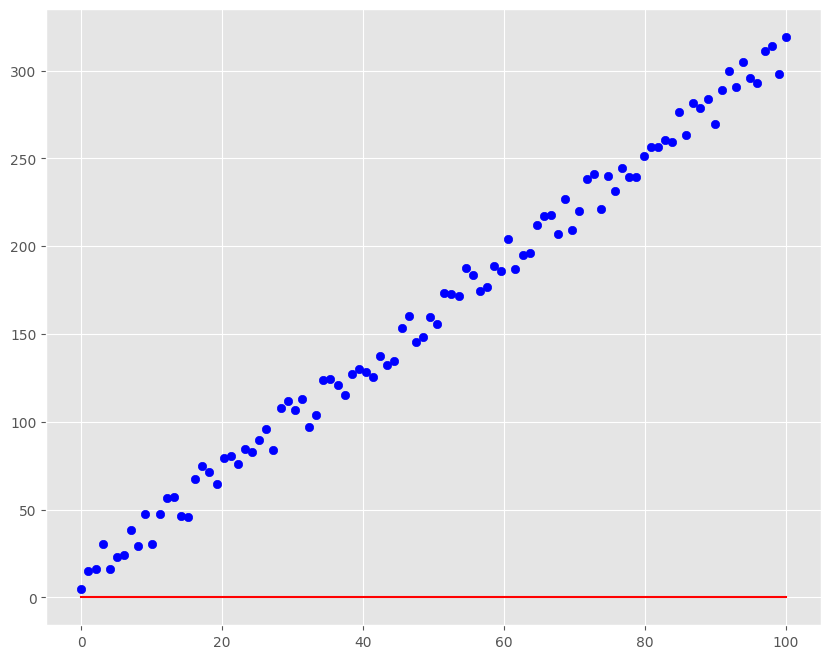

Average distance: 161.95



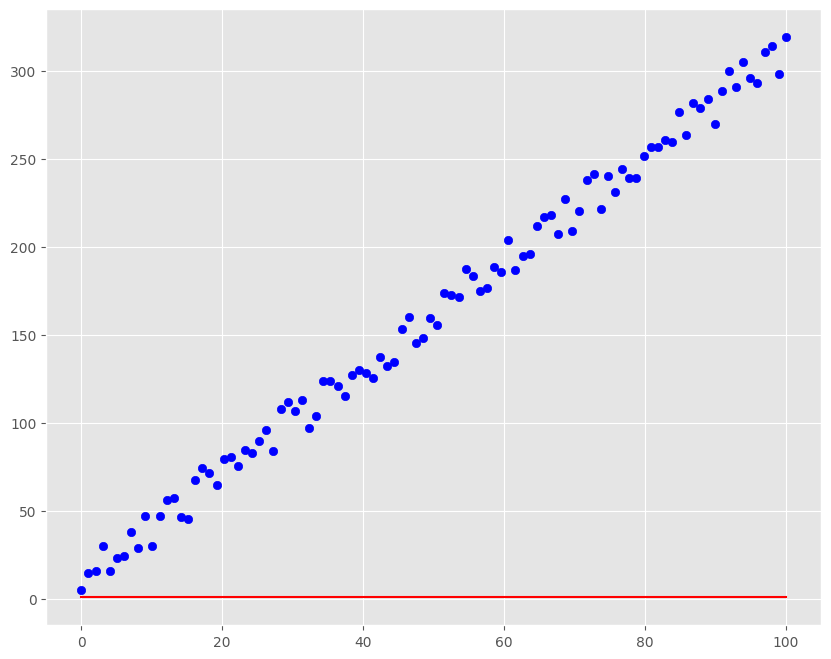

Average distance: 160.95



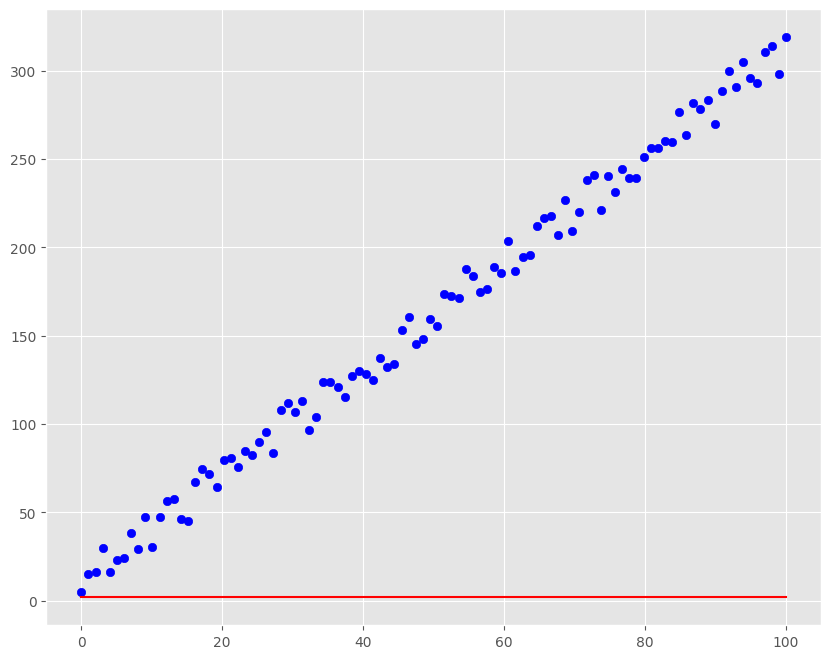

Average distance: 159.95



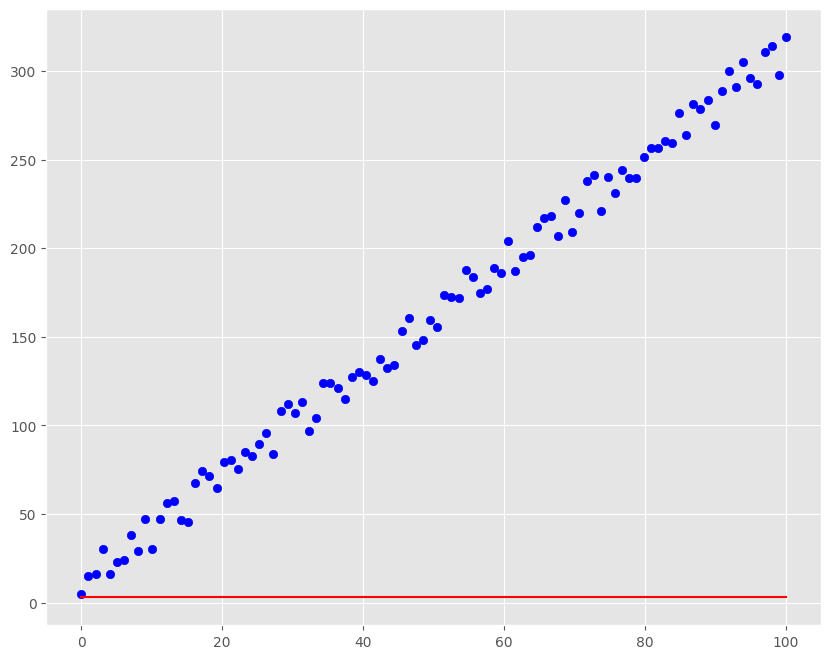

Average distance: 158.95



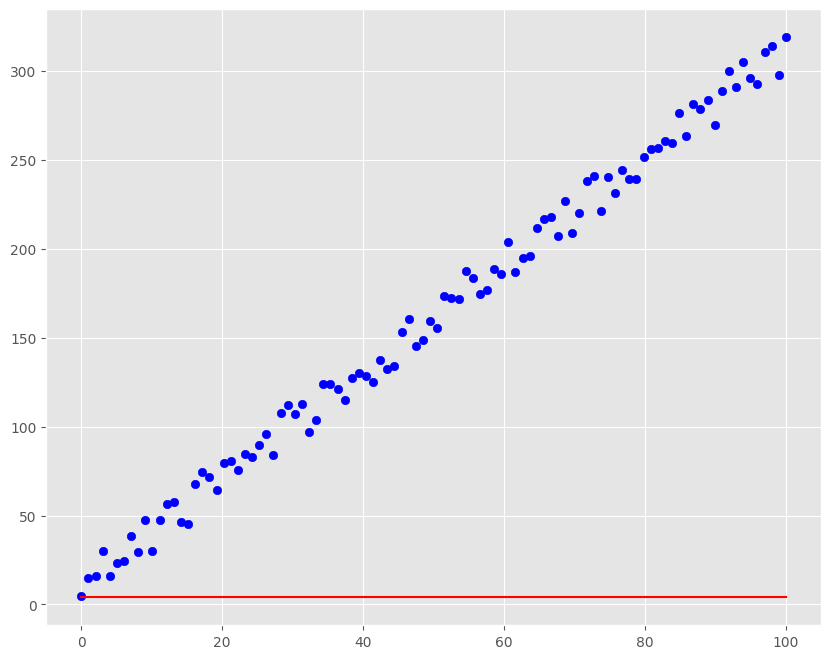

Average distance: 157.95



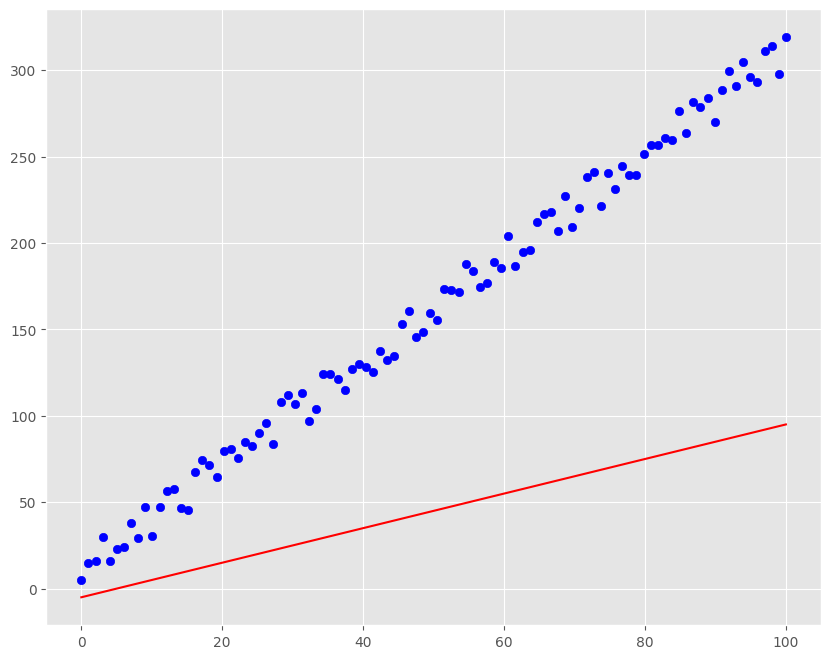

Average distance: 116.95



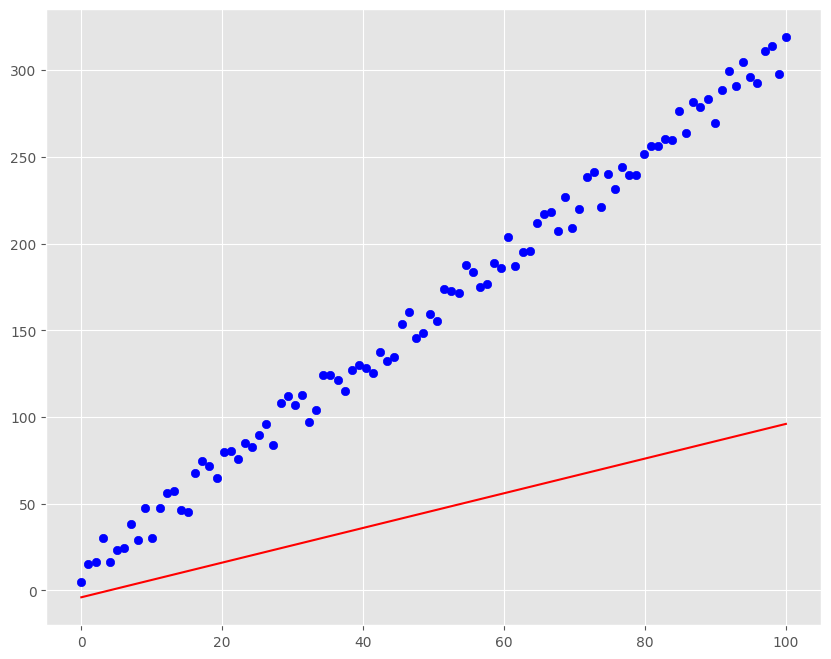

Average distance: 115.95



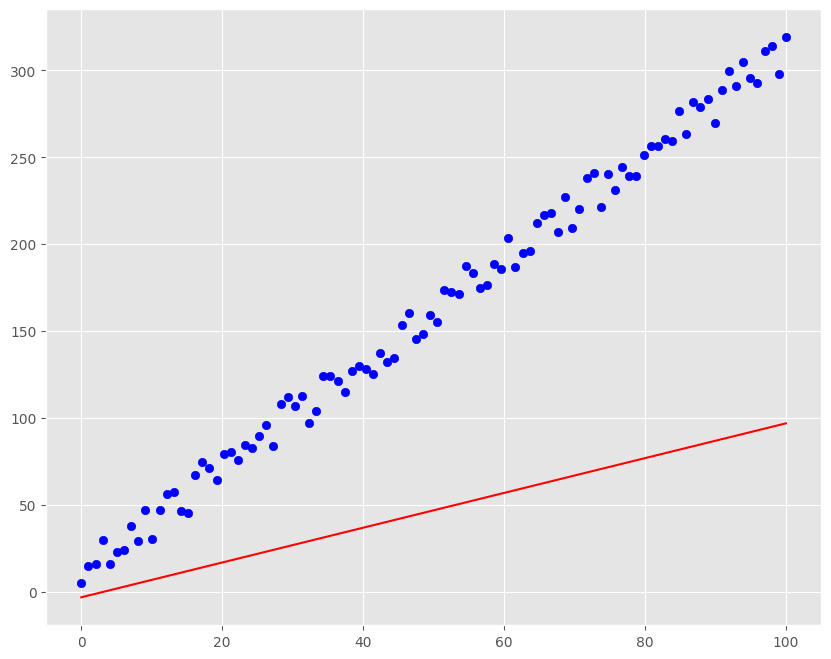

Average distance: 114.95



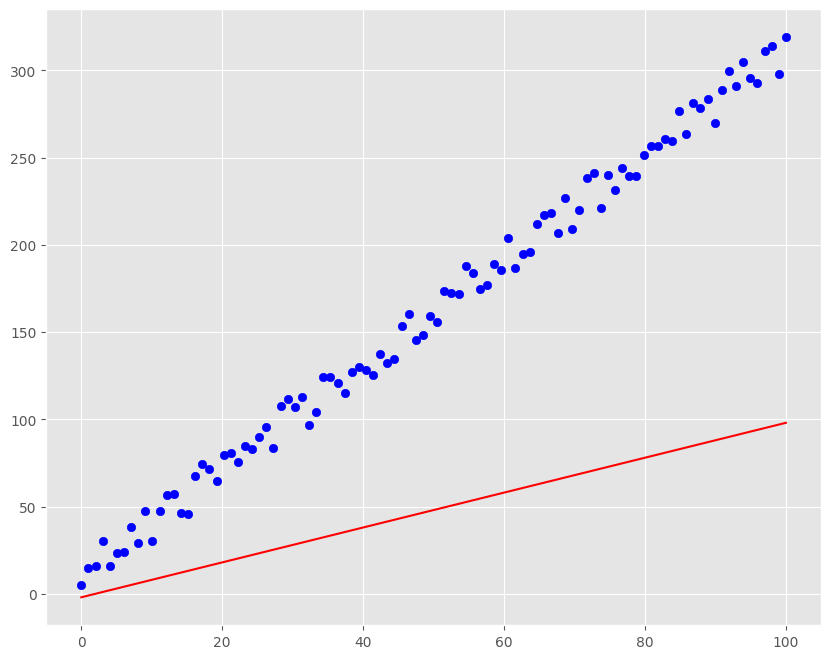

Average distance: 113.95



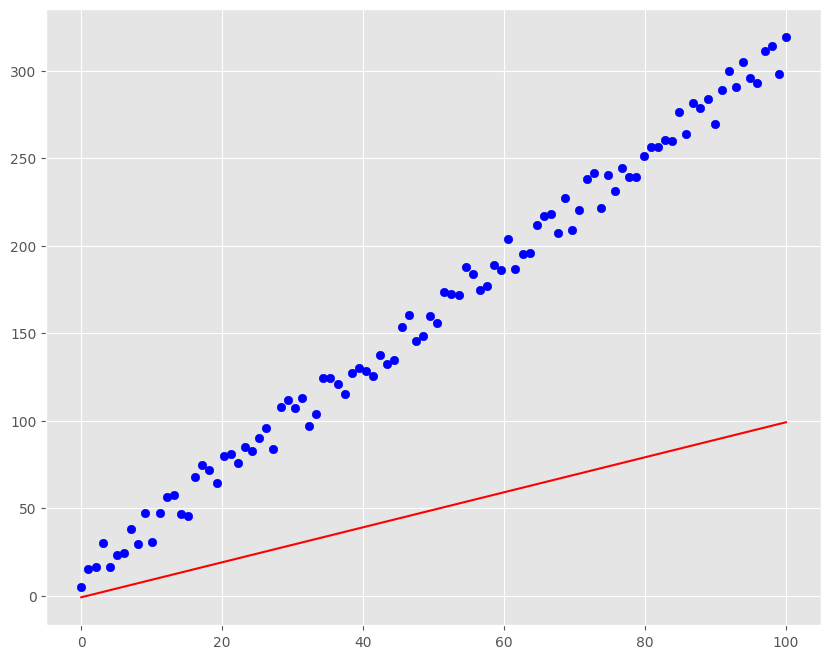

Average distance: 112.95



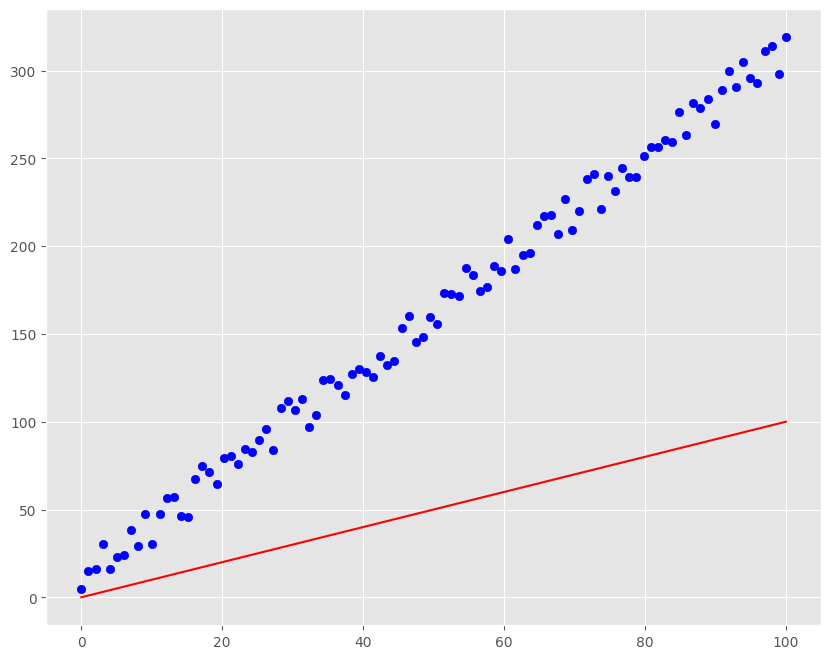

Average distance: 111.95



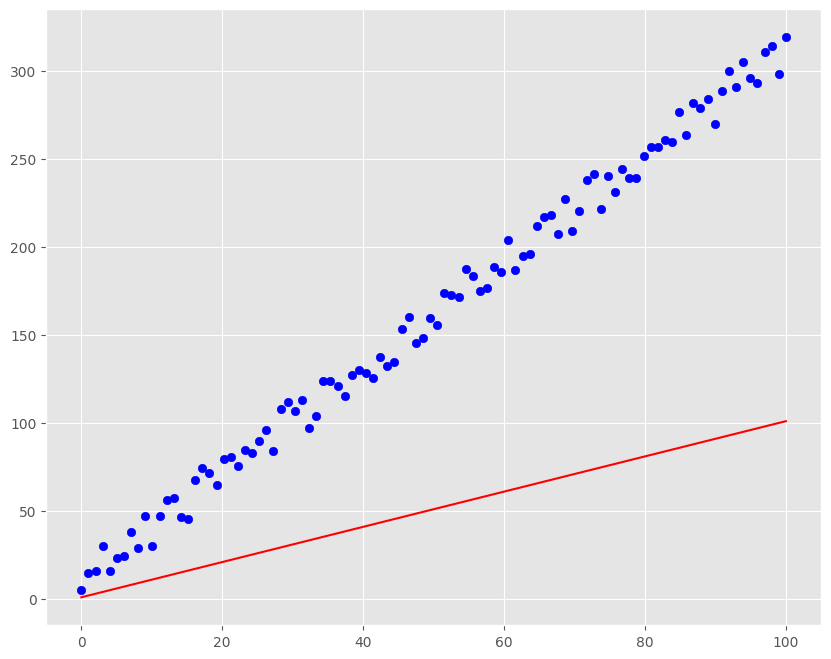

Average distance: 110.95



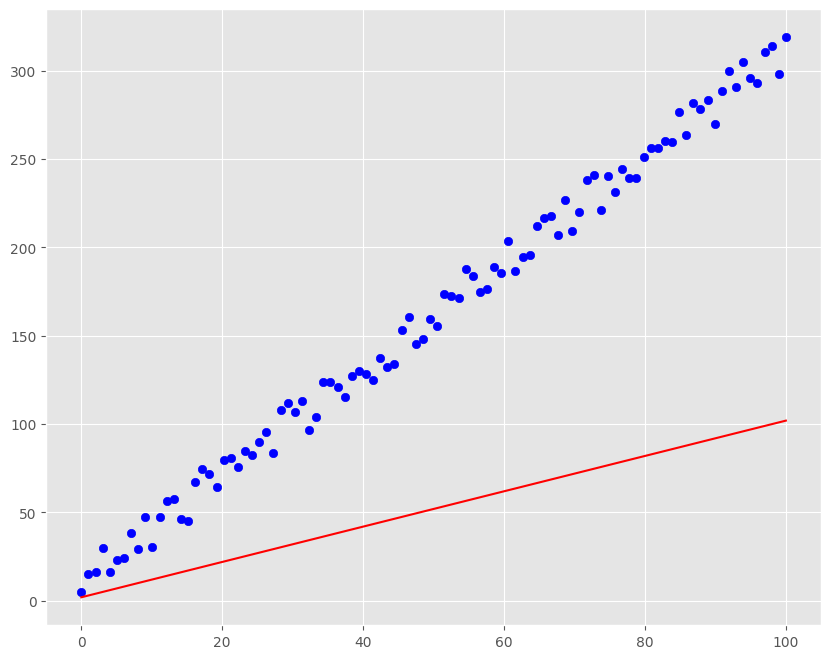

Average distance: 109.95



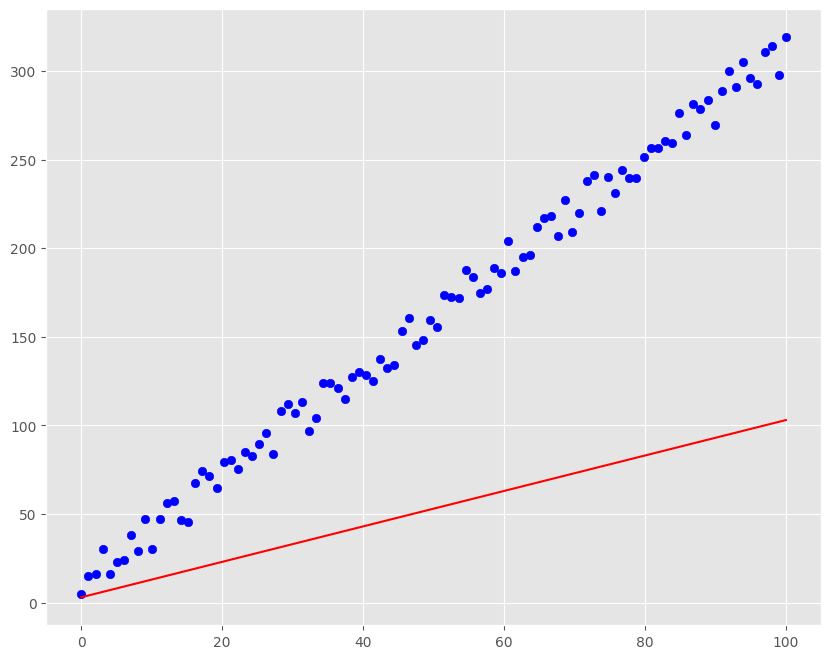

Average distance: 108.95



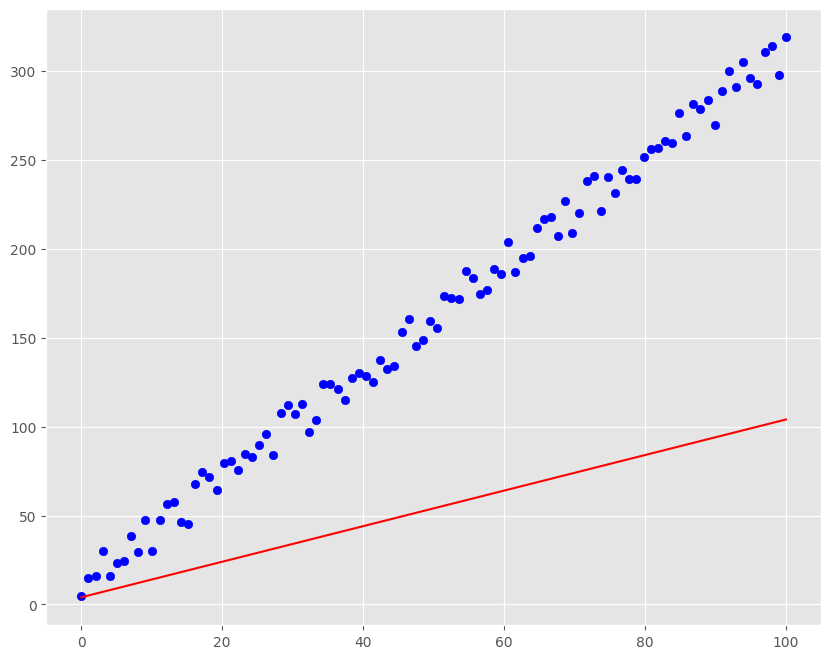

Average distance: 107.95



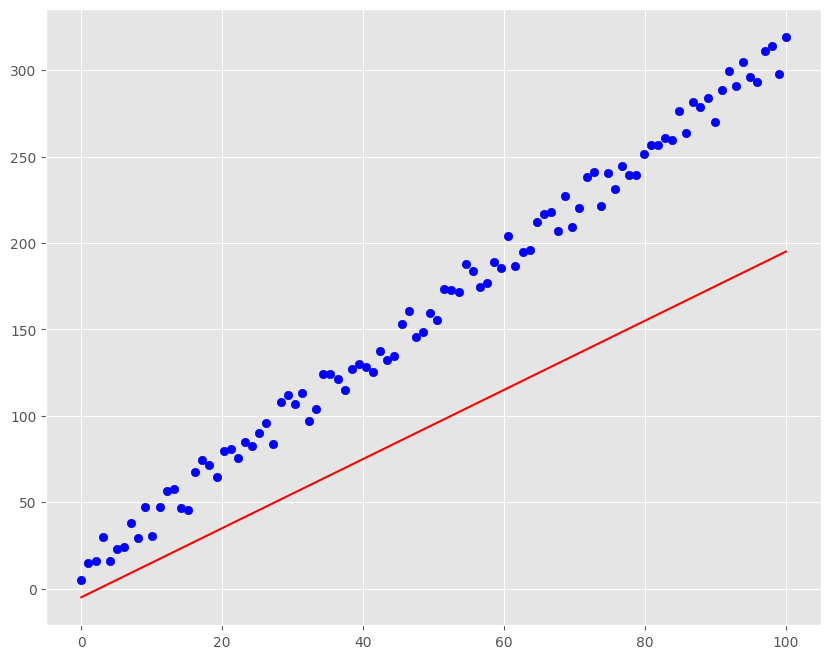

Average distance: 66.95



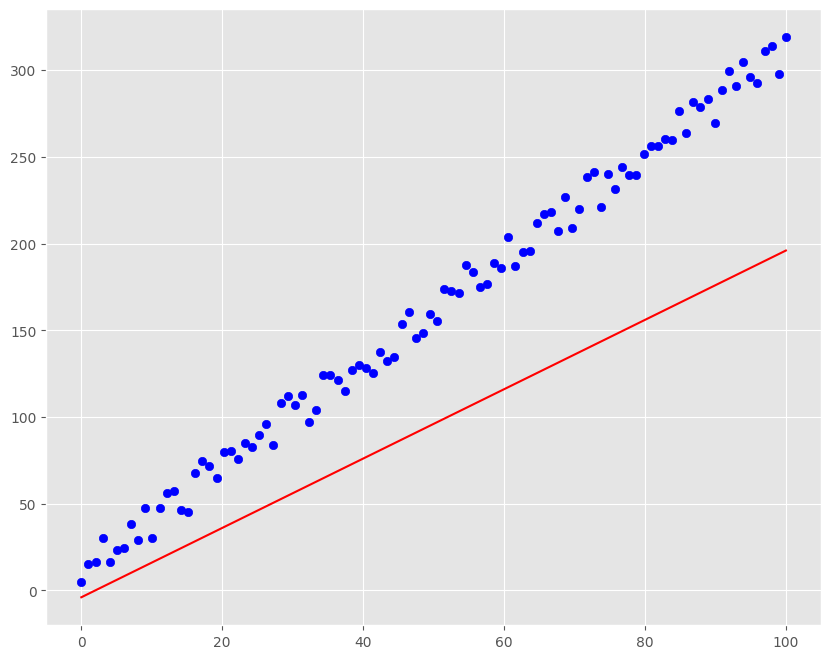

Average distance: 65.95



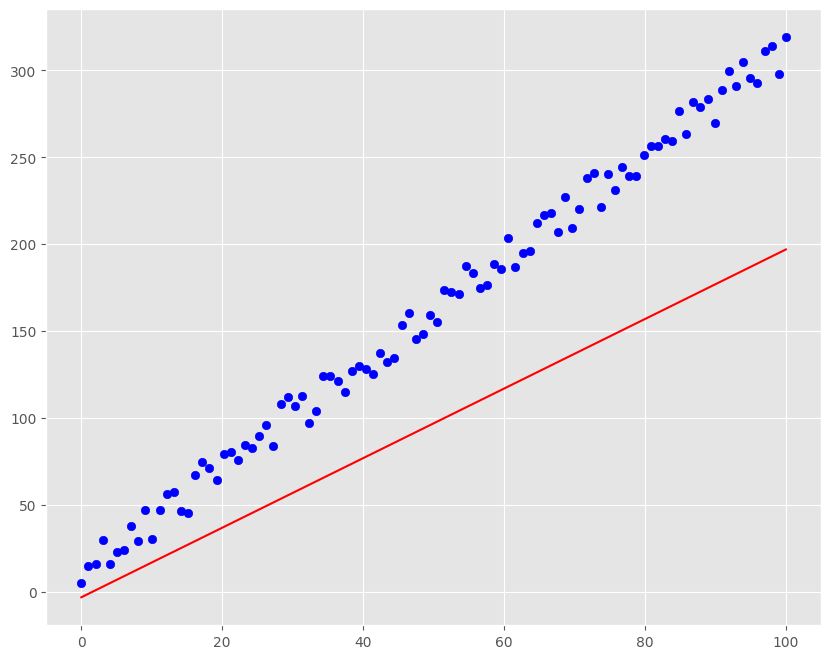

Average distance: 64.95



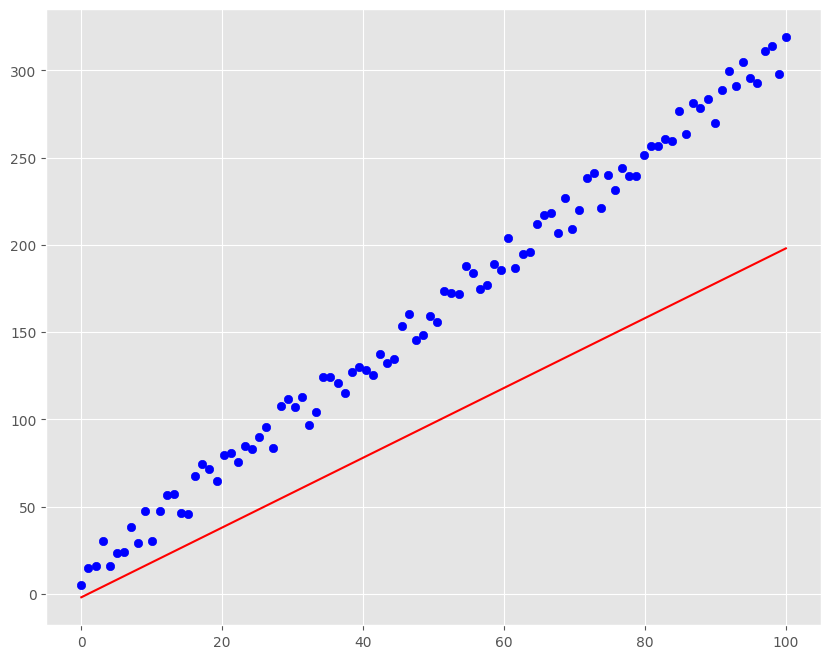

Average distance: 63.95



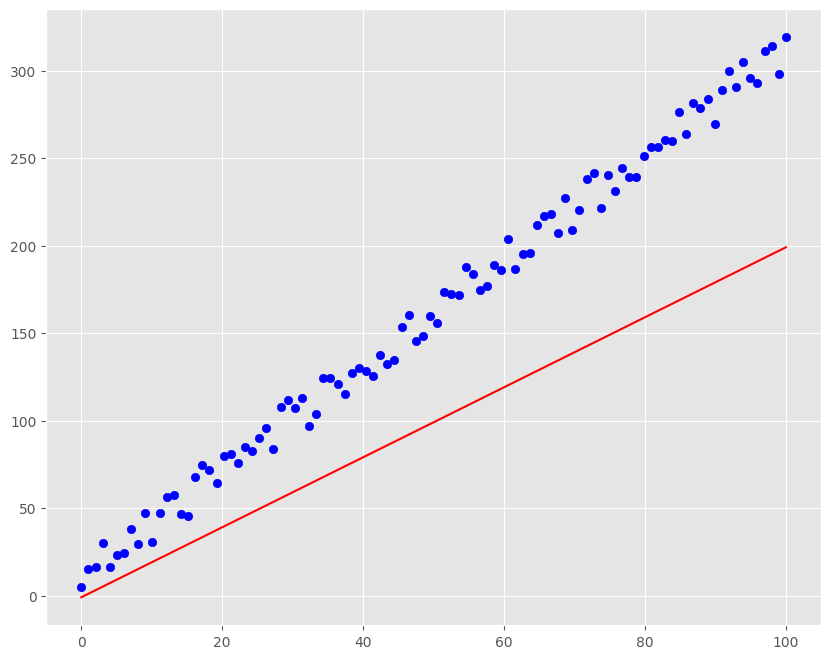

Average distance: 62.95



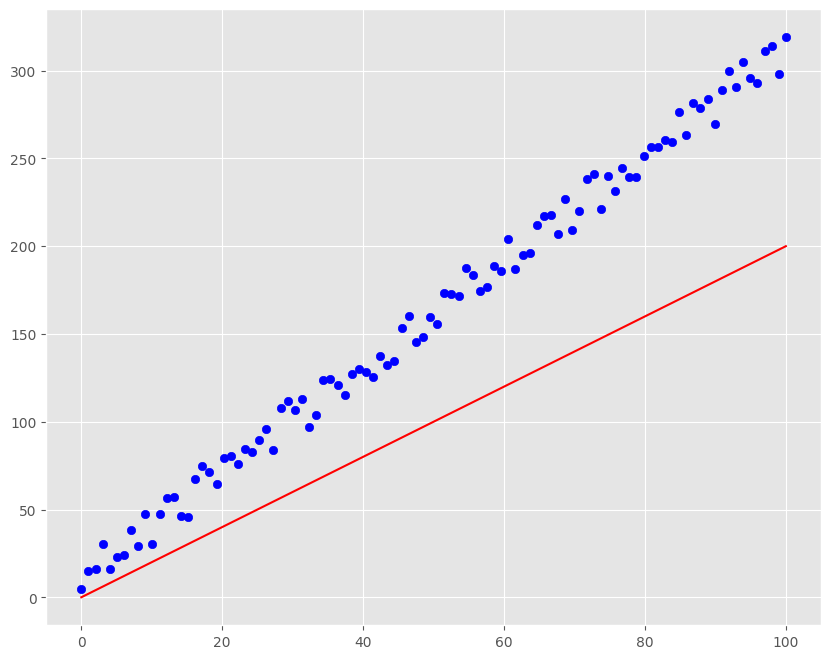

Average distance: 61.95



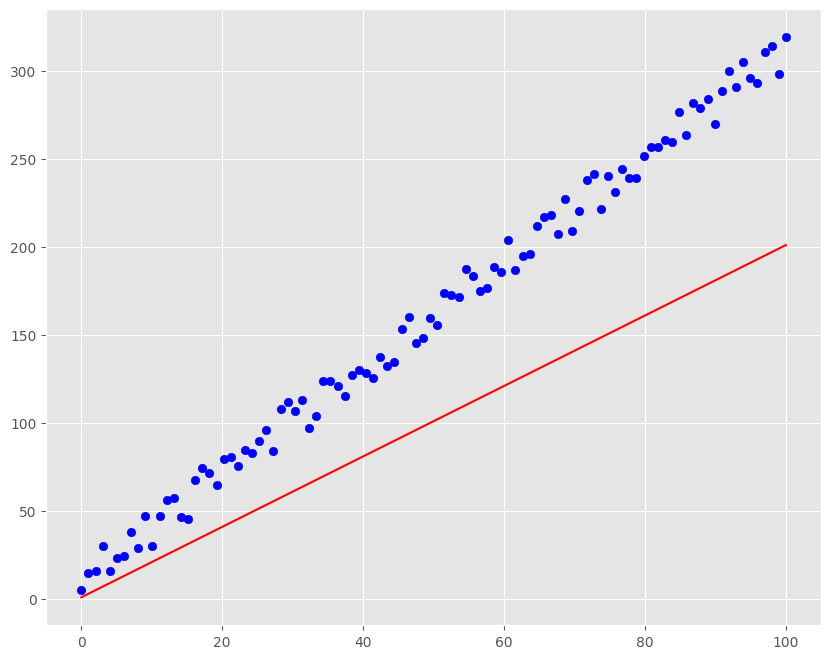

Average distance: 60.95



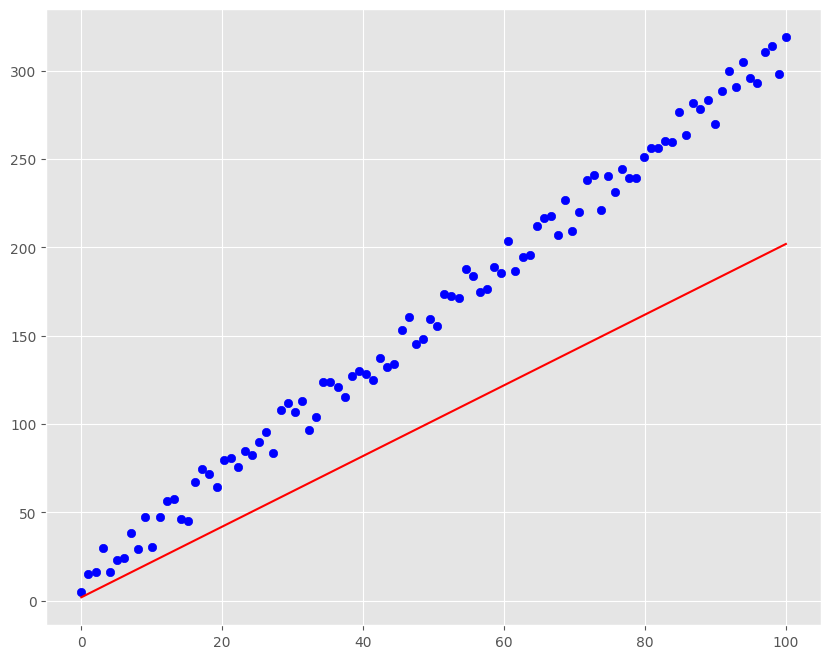

Average distance: 59.95



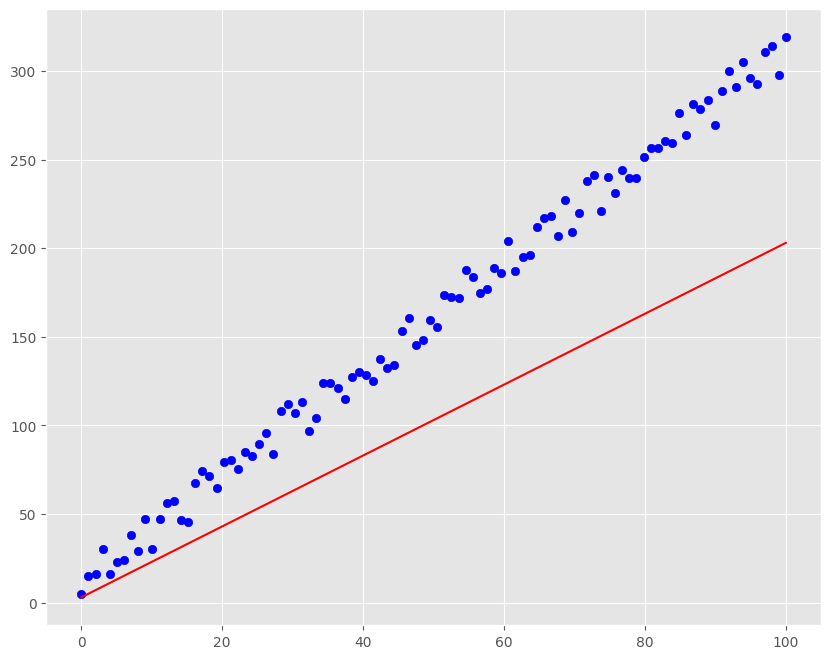

Average distance: 58.95



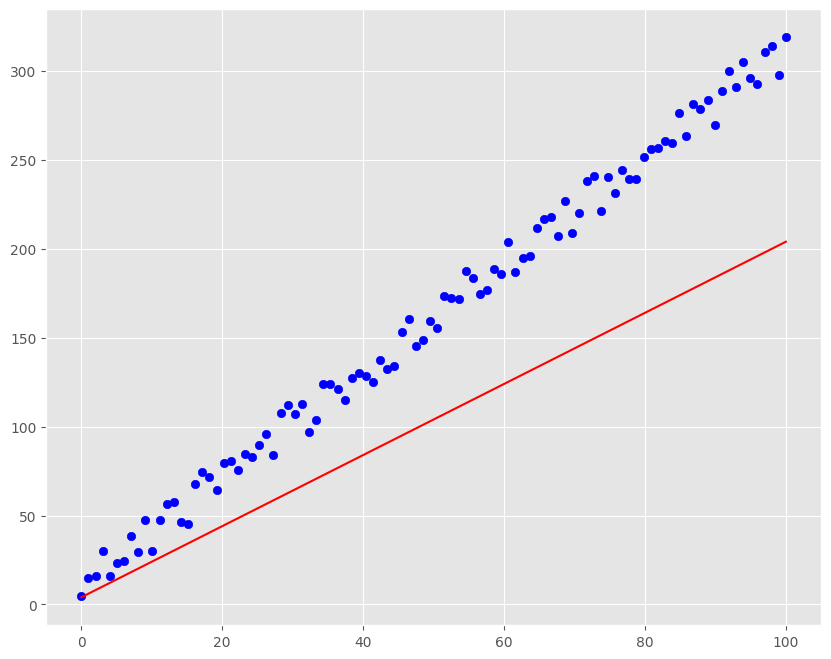

Average distance: 57.95



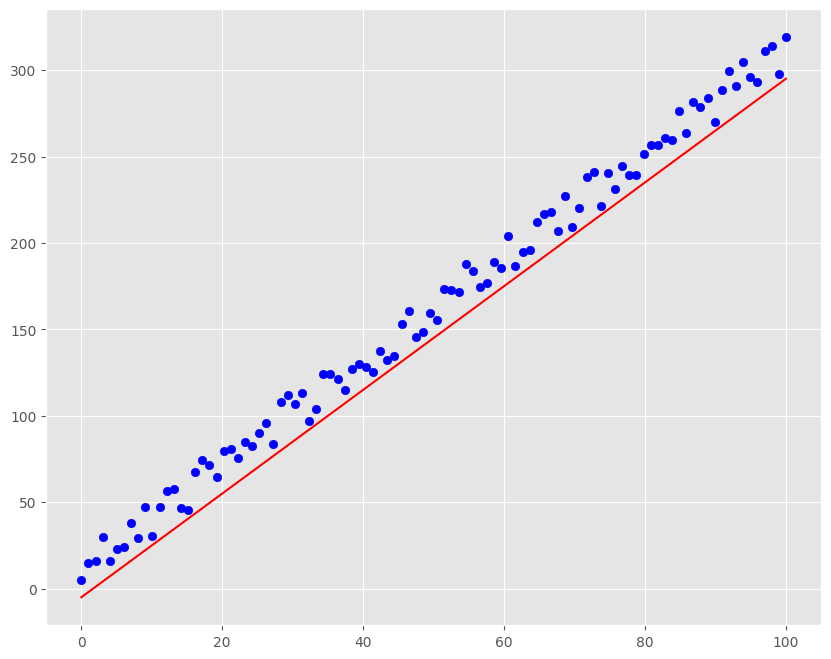

Average distance: 16.95



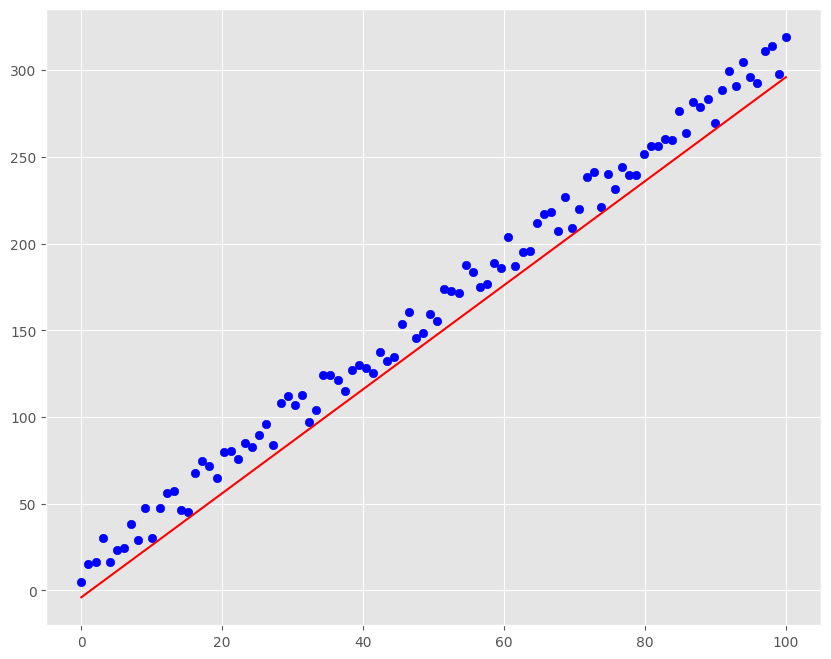

Average distance: 15.95



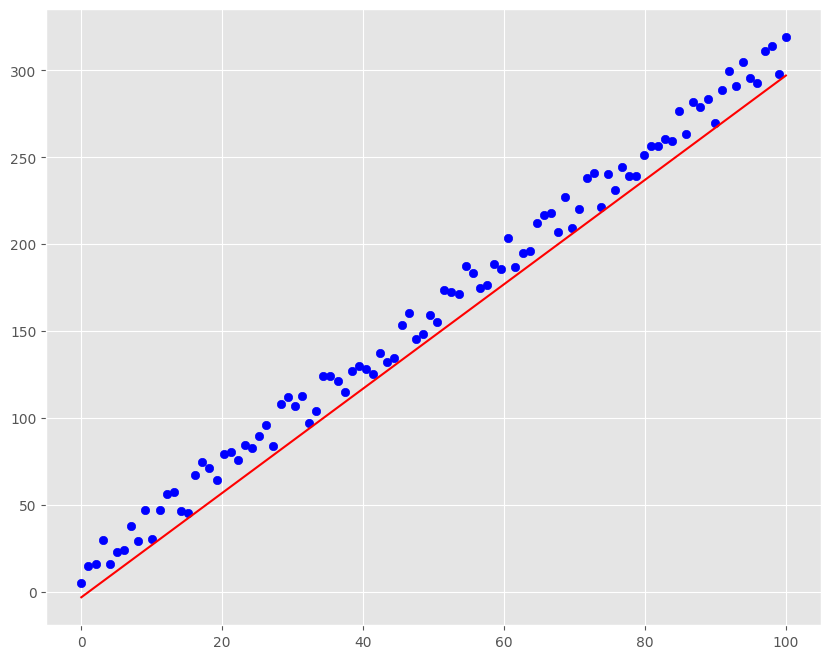

Average distance: 14.95



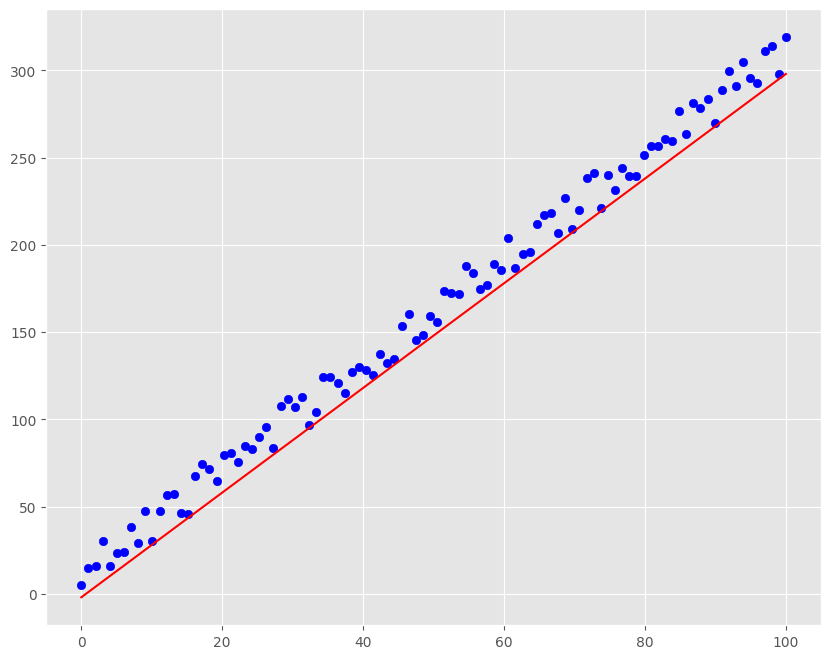

Average distance: 13.95



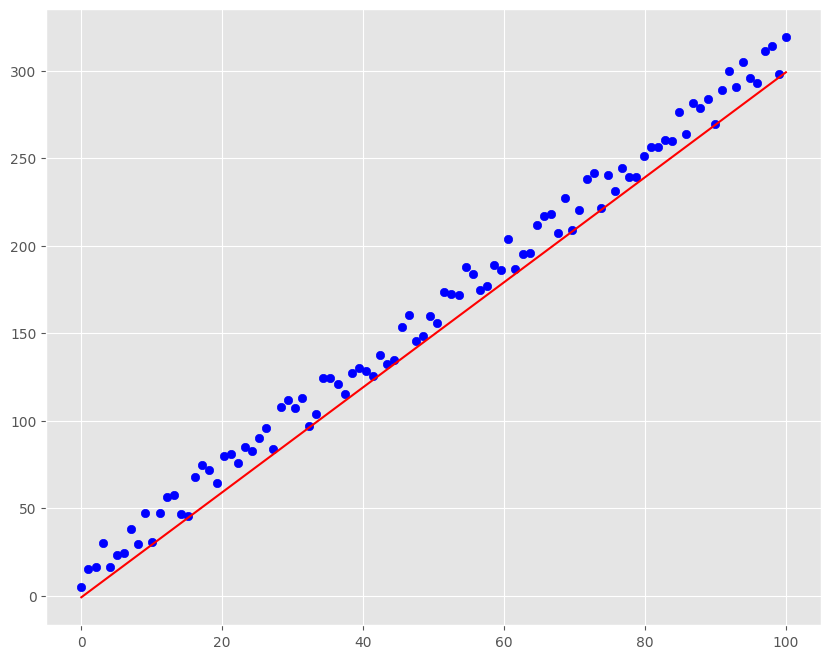

Average distance: 12.95



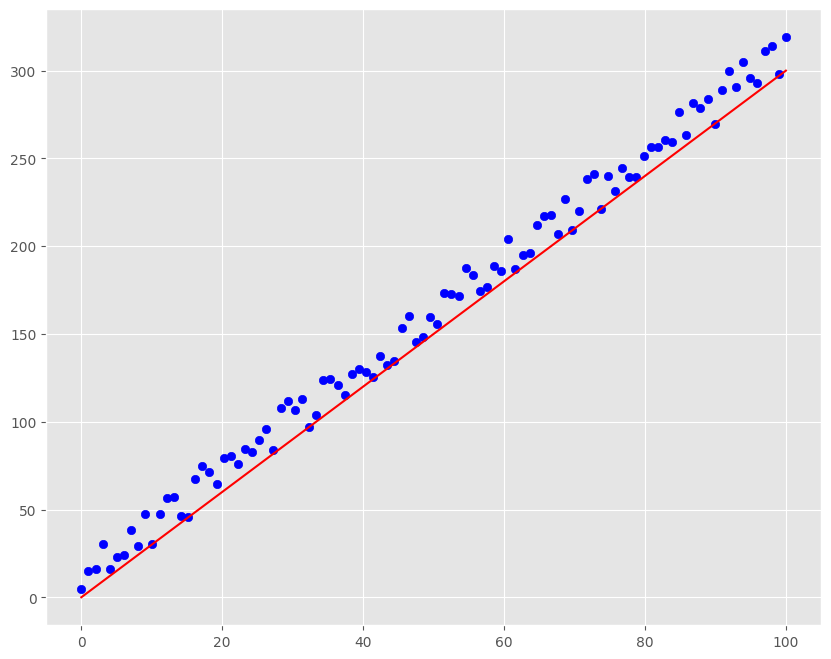

Average distance: 11.95



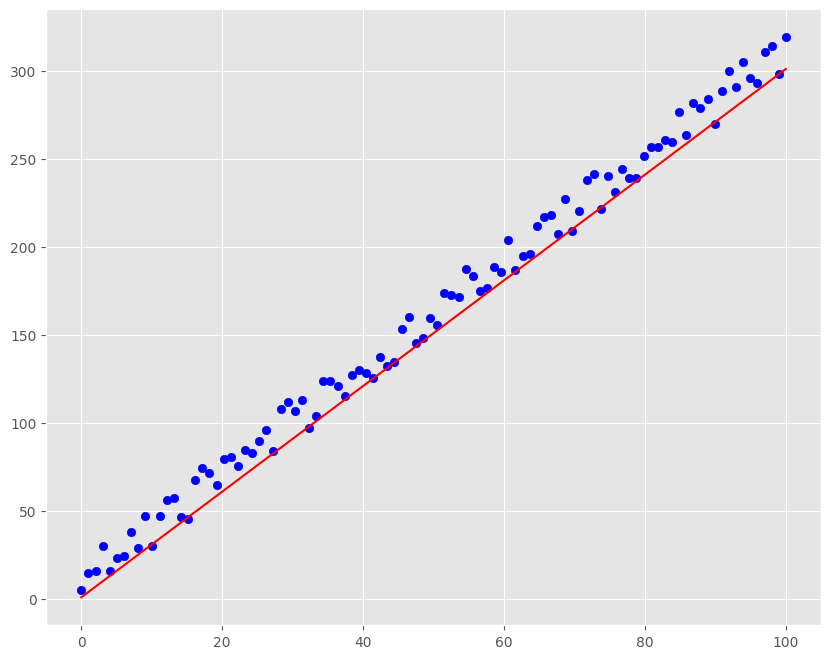

Average distance: 11.07



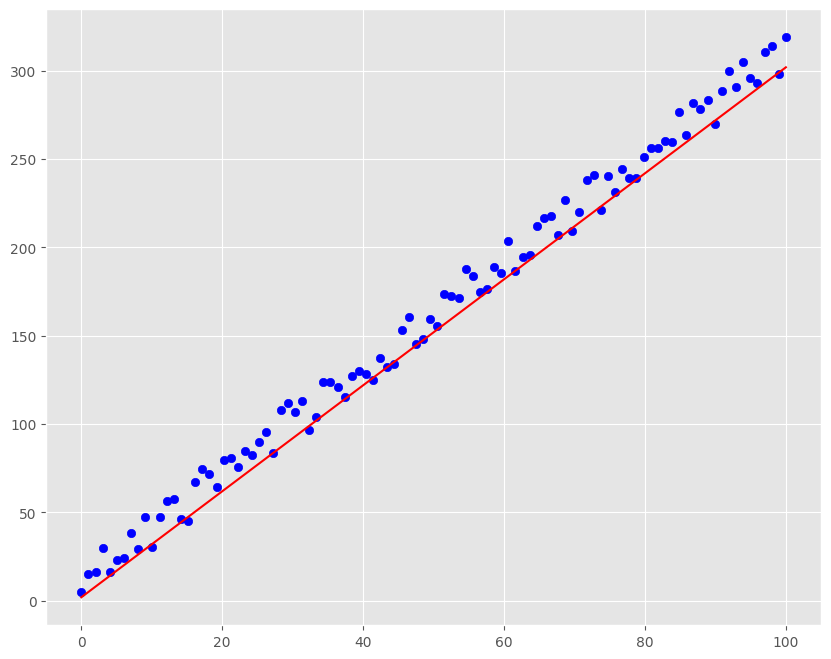

Average distance: 10.25



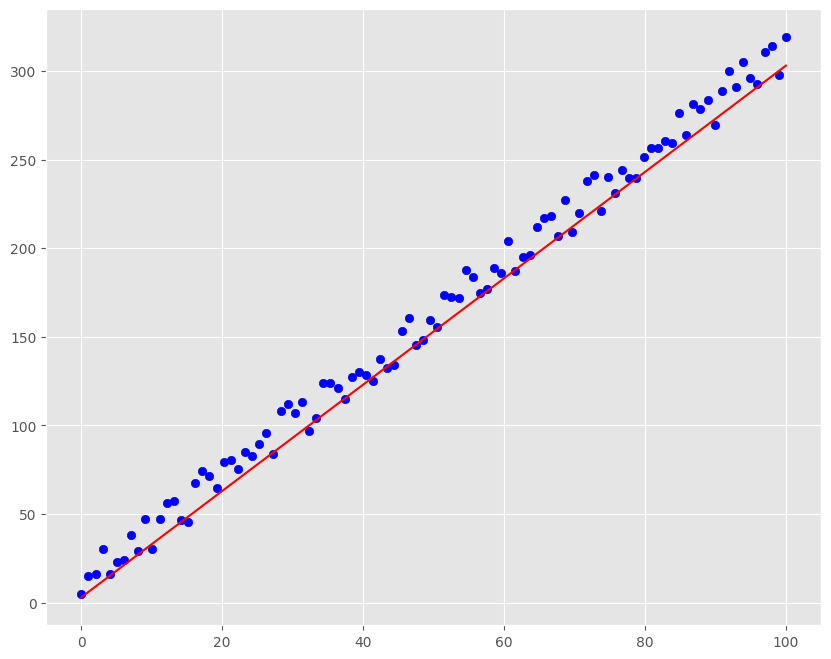

Average distance: 9.49



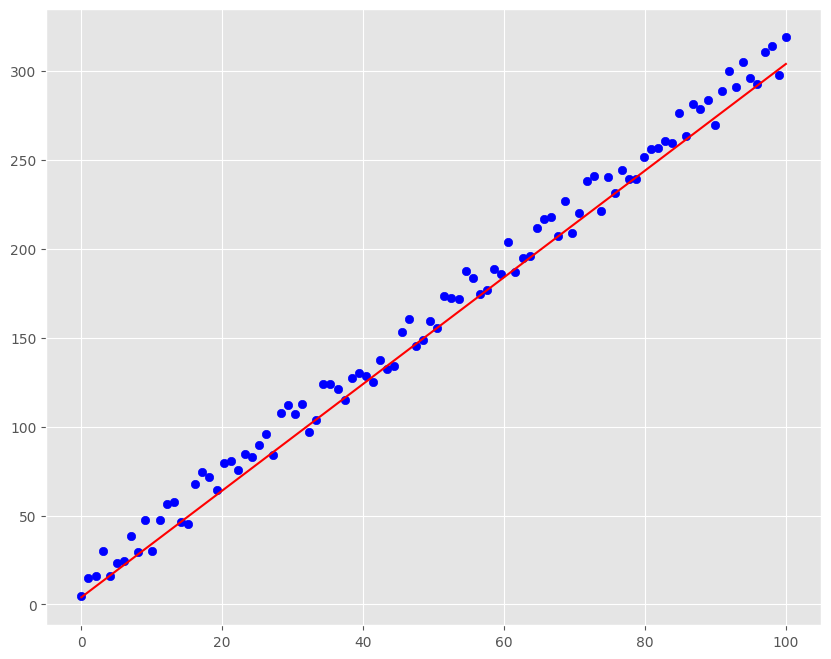

Average distance: 8.81



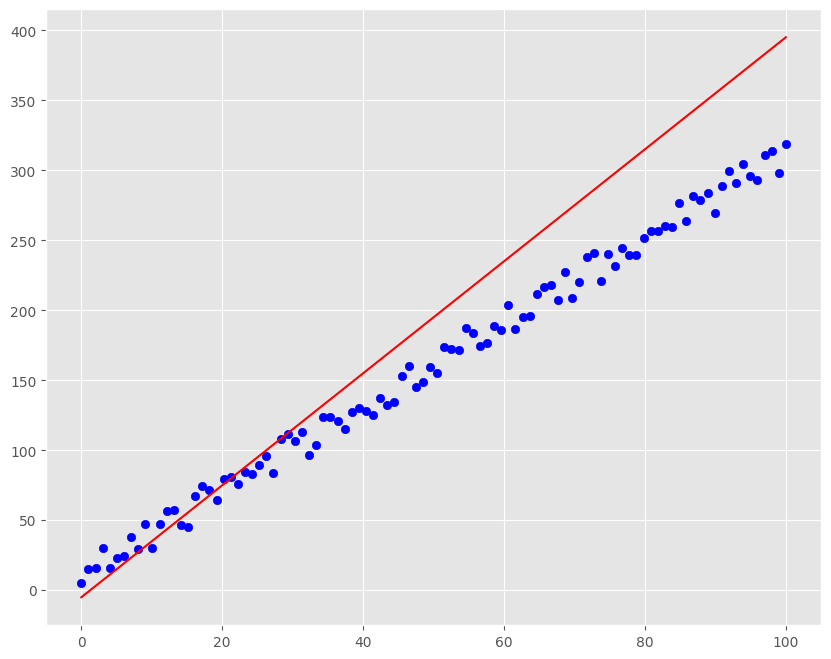

Average distance: 36.455050505050515



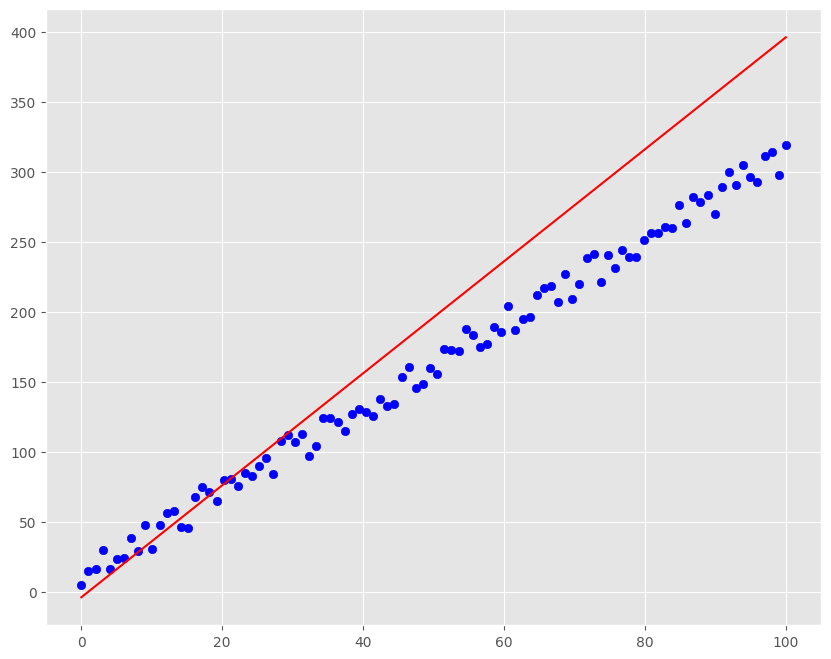

Average distance: 37.099292929292936



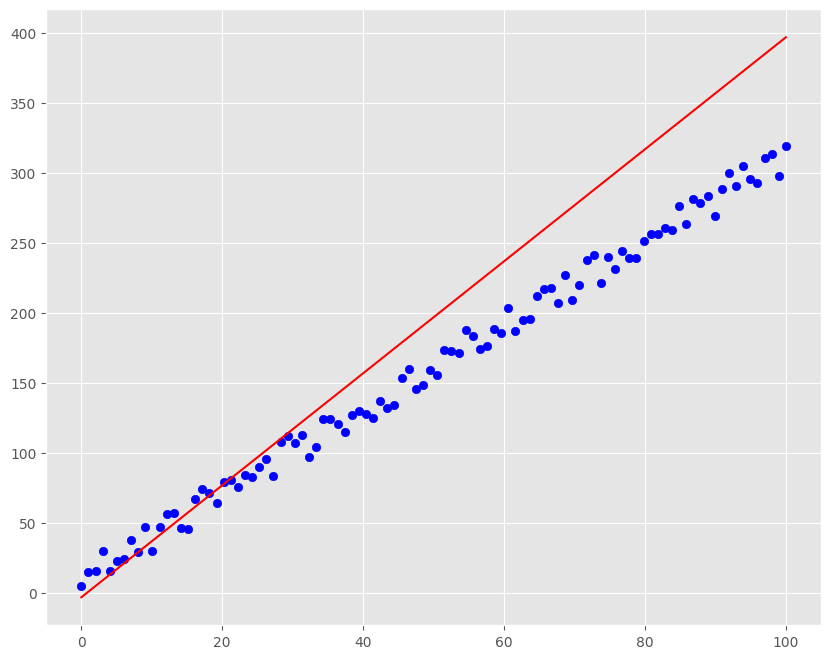

Average distance: 37.7609090909091



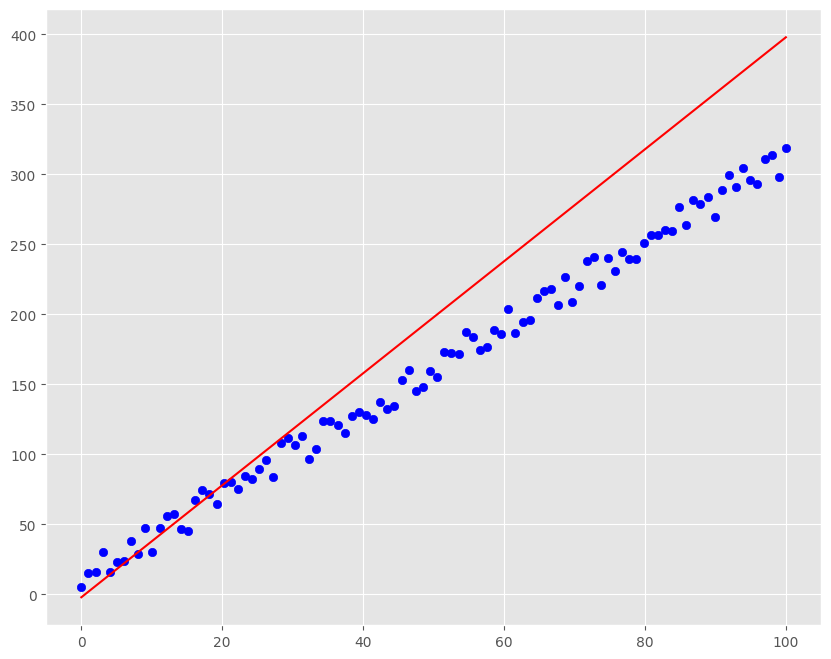

Average distance: 38.4409090909091



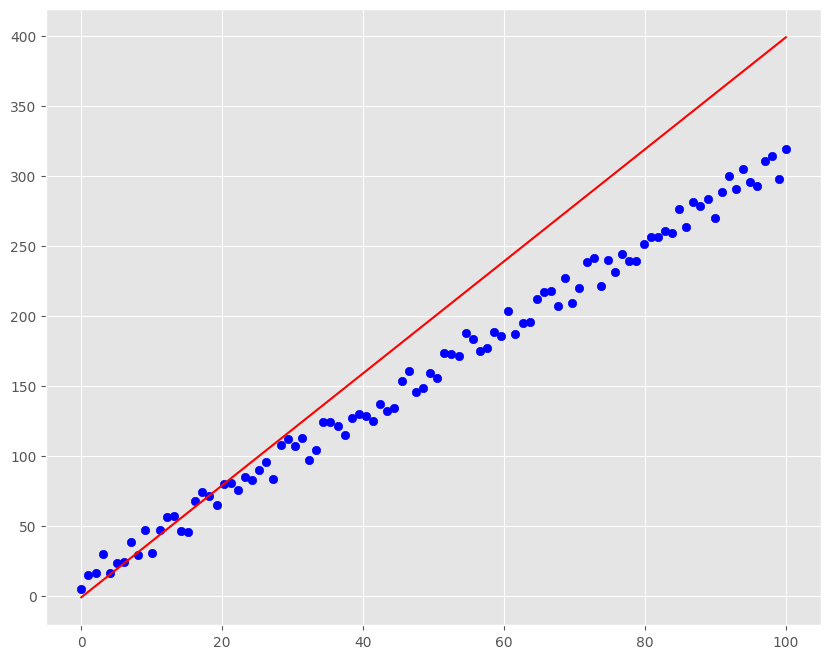

Average distance: 39.128585858585865



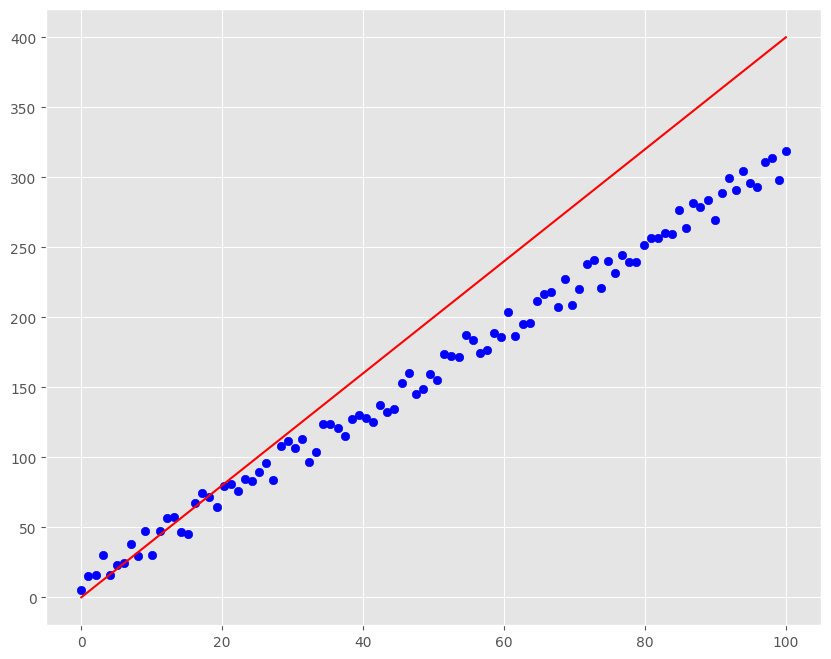

Average distance: 39.85060606060607



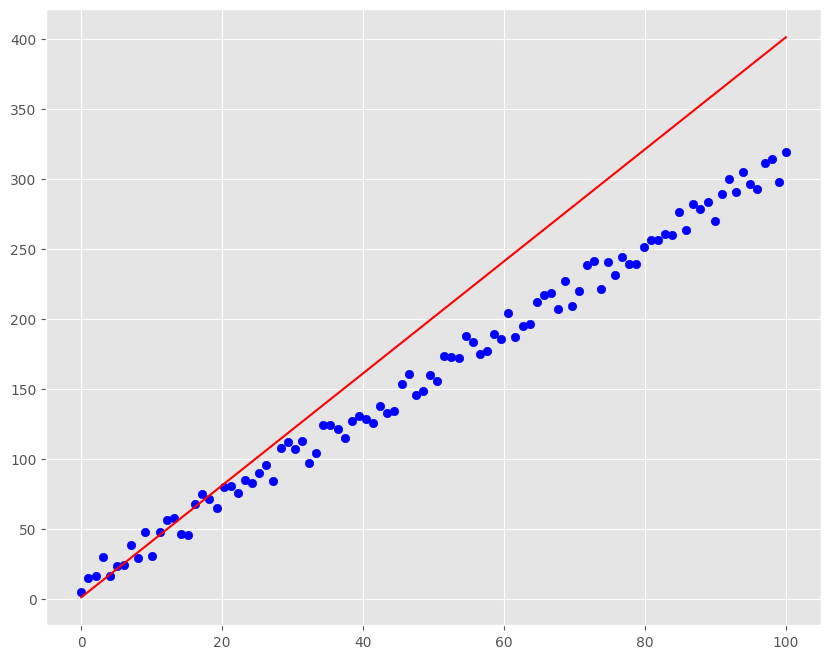

Average distance: 40.61060606060607



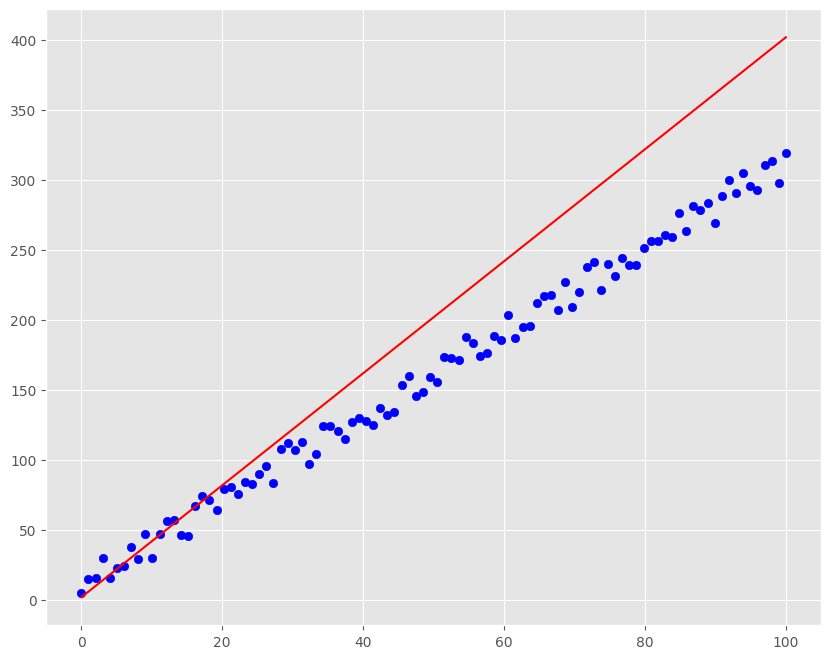

Average distance: 41.37060606060607



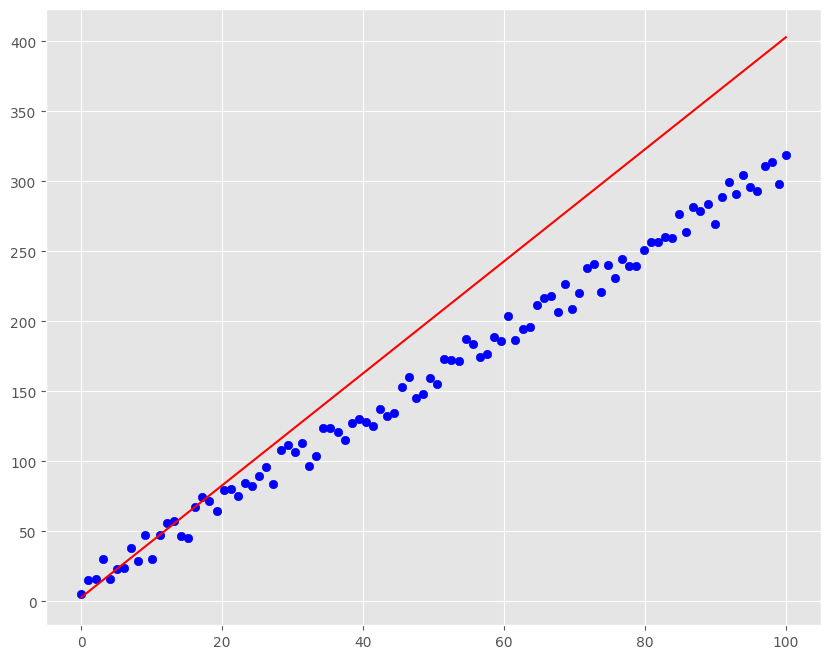

Average distance: 42.13707070707071



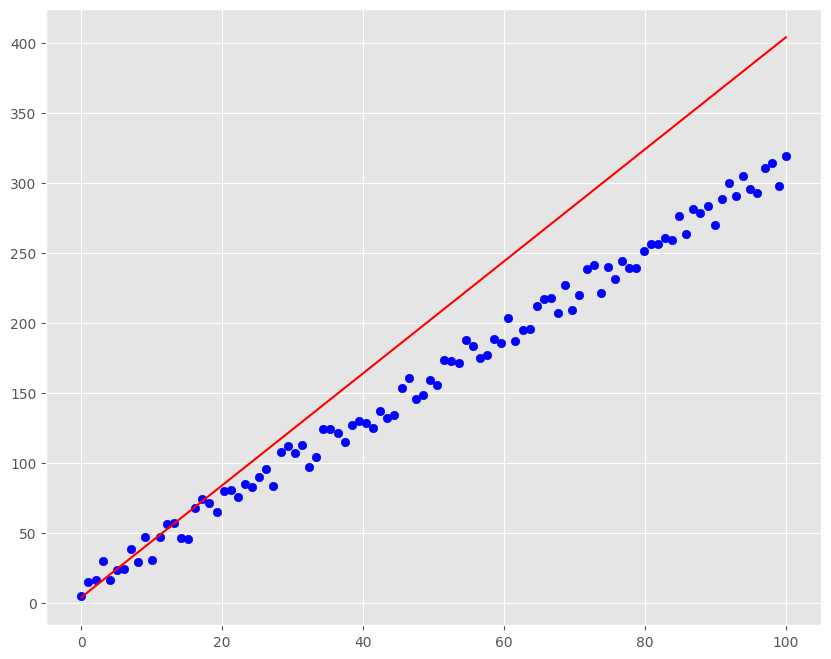

Average distance: 42.95707070707071



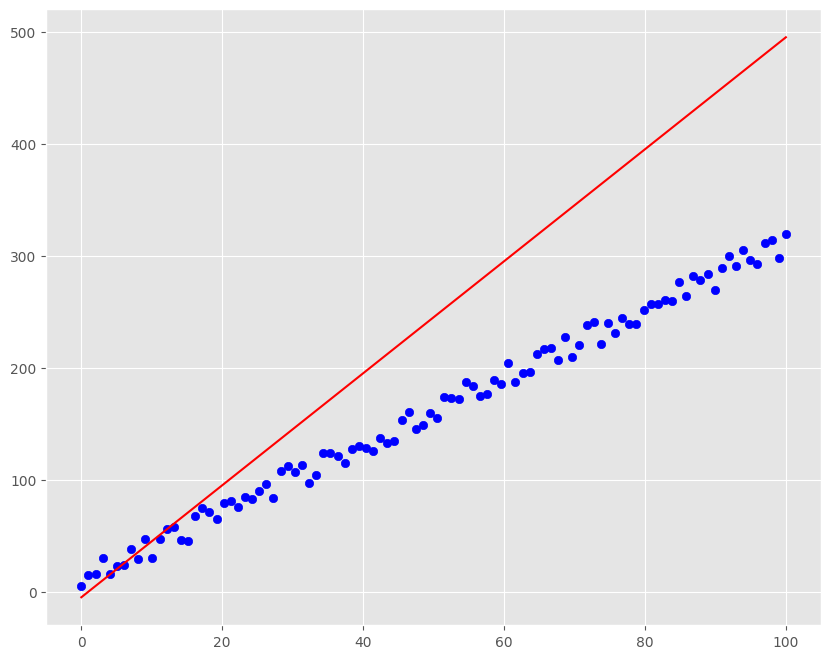

Average distance: 84.55262626262628



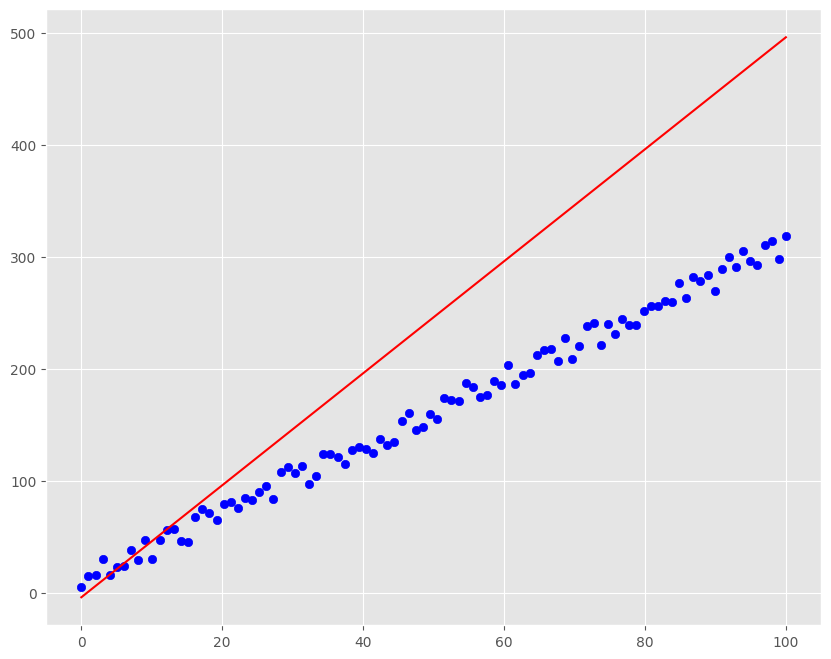

Average distance: 85.37909090909092



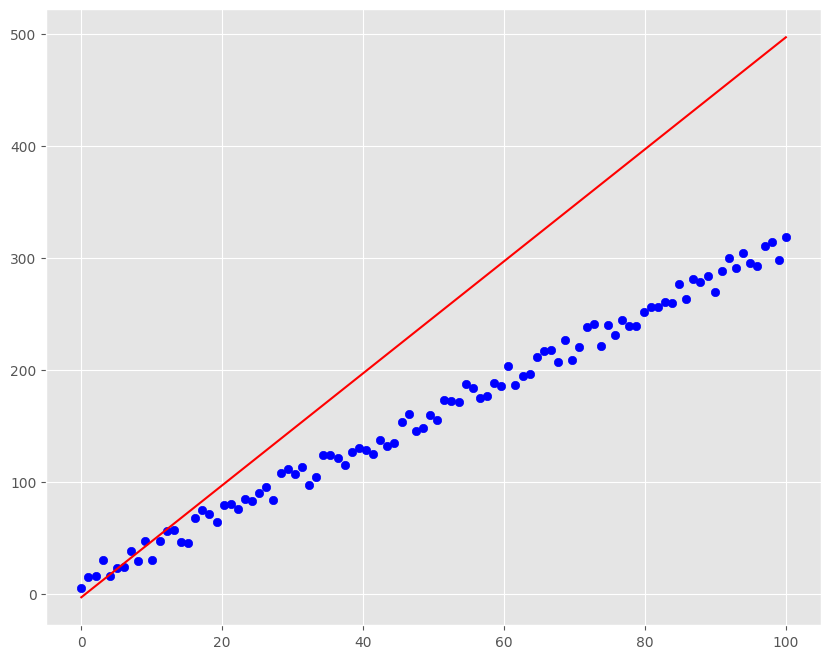

Average distance: 86.23909090909092



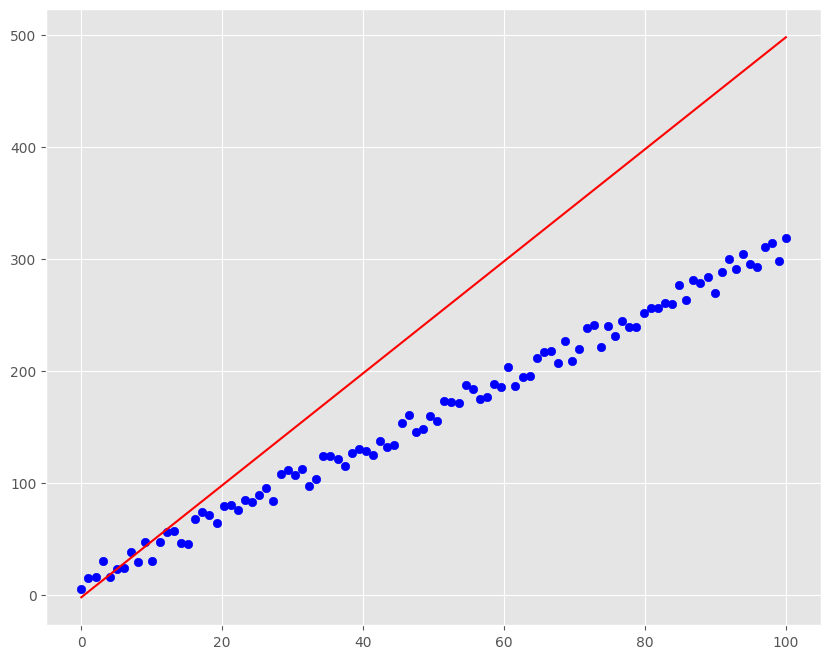

Average distance: 87.10111111111114



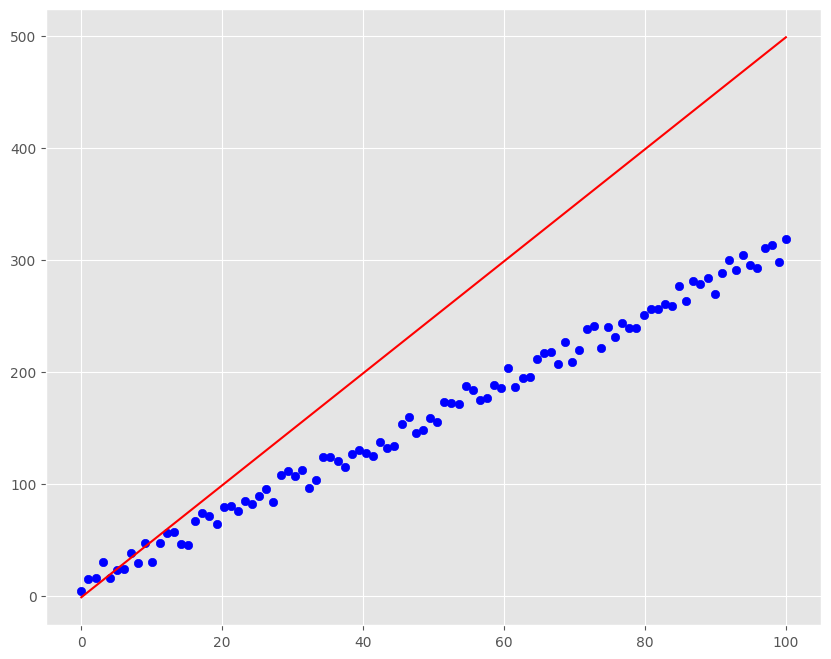

Average distance: 87.98111111111112



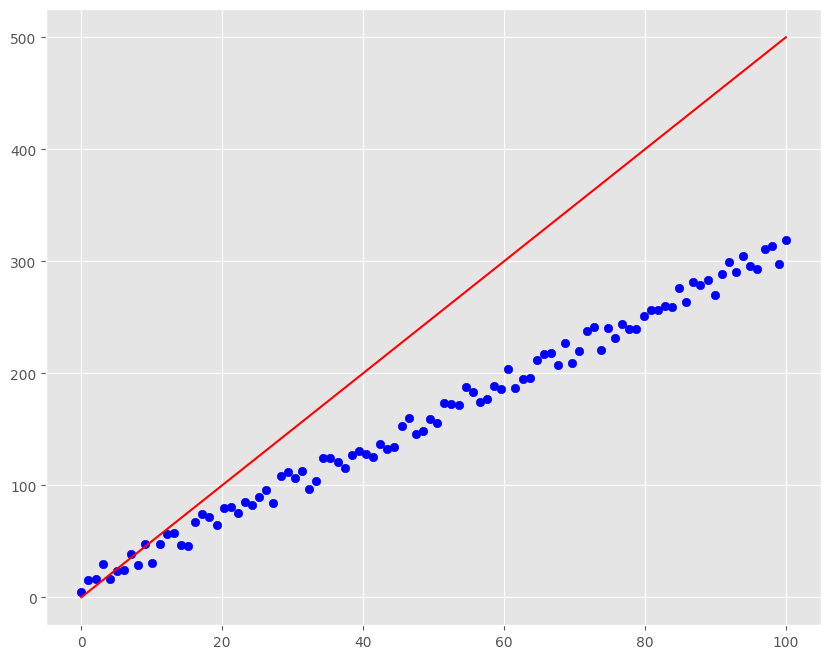

Average distance: 88.86111111111111



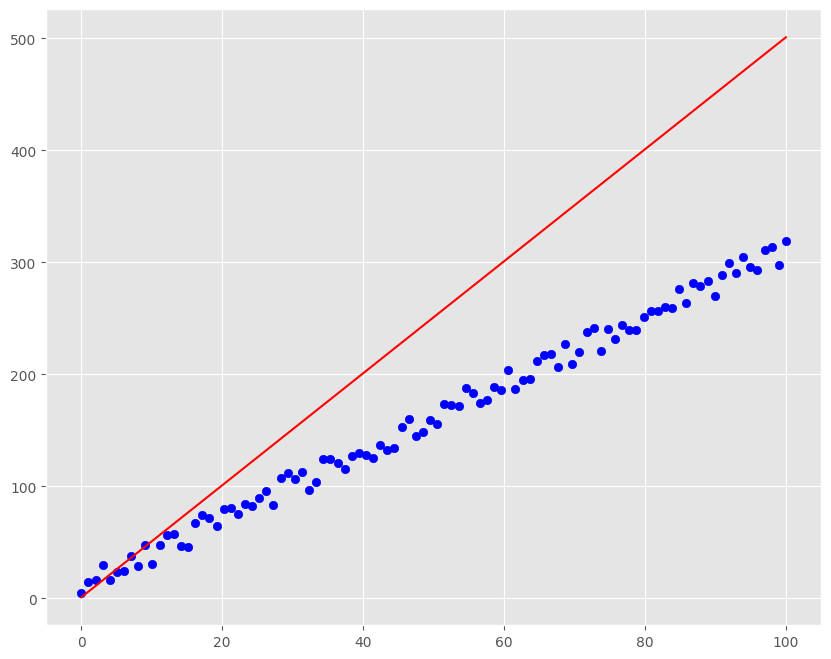

Average distance: 89.74111111111114



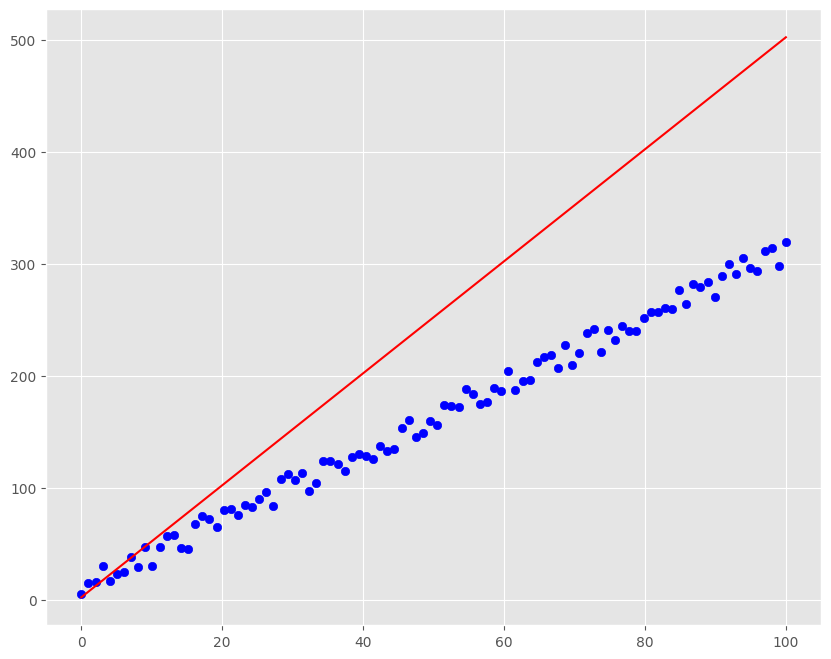

Average distance: 90.6247474747475



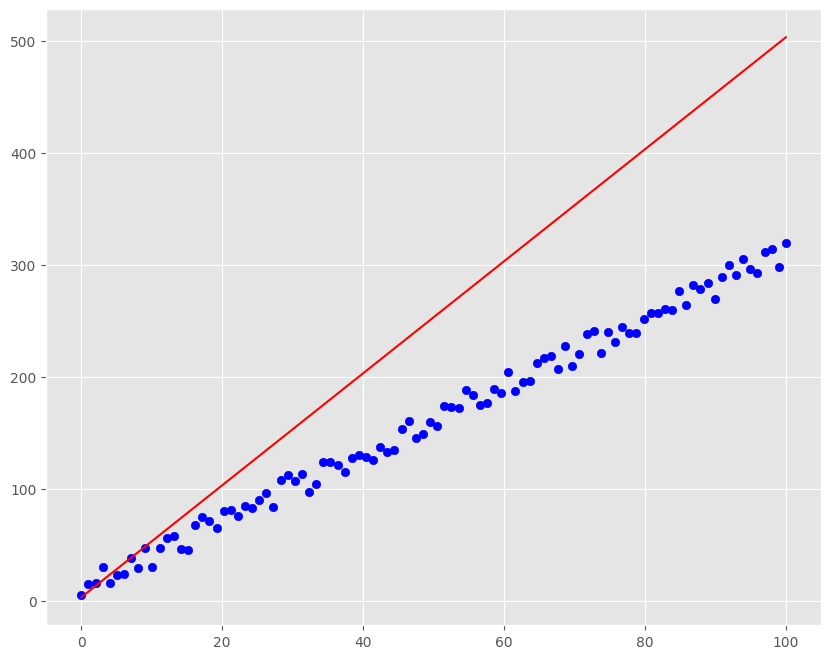

Average distance: 91.52757575757578



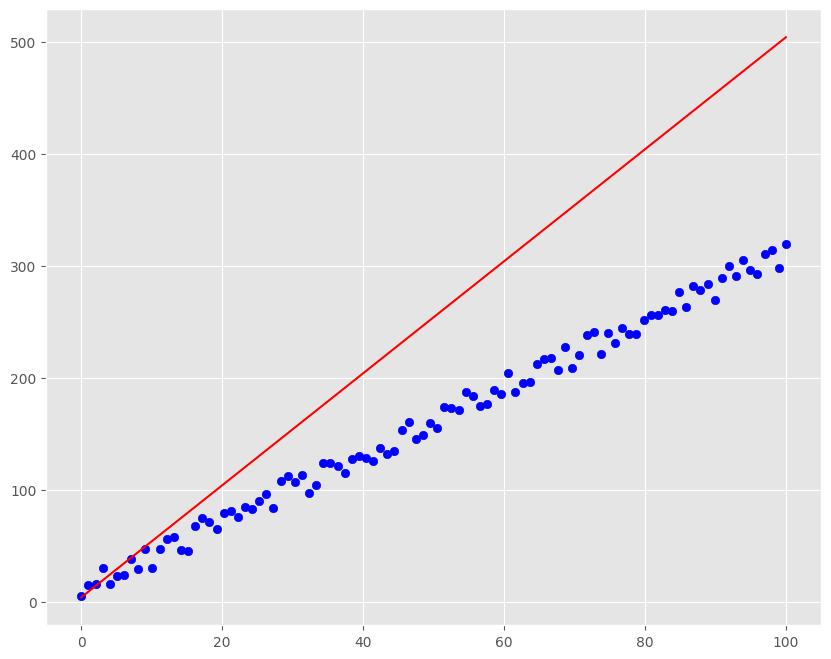

Average distance: 92.44757575757576



In [3]:
for m in range(-2,6):
  for c in range(-5,5):
    py = (m*x + c).reshape((-1,1))

    plt.plot(x,py,color="red")
    plt.scatter(x,y,color="blue")
    plt.show()

    print("Average distance: {}\n".format(np.mean(np.sqrt((y-py)**2))))

In [5]:
def lin_regression(x,y):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  plt.title("Visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
  plt.show()

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

The coefficient is: 3.0081747118394633 and the intercept is: 12.221332851809166



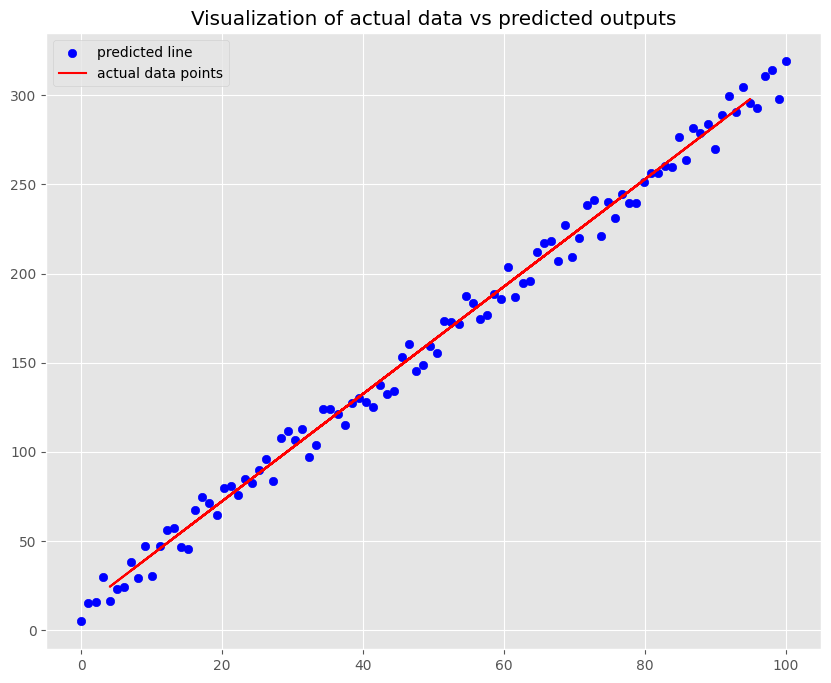

The RMSE for linear regression is: 7.606639785243553


In [6]:
lin_regression(x,y)

## The need for polynomial regression

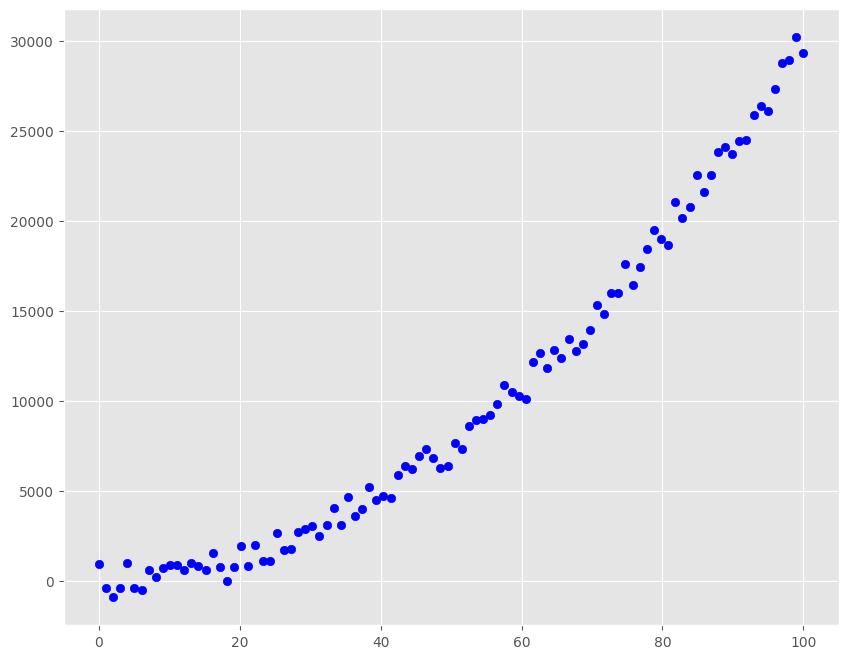

In [7]:

y2 = (np.random.randint(-1000,1000,x.shape)).astype(int).reshape((-1,1)) + 3*x**2
plt.scatter(x,y2,color="blue")
plt.show()

In [8]:
def poly_regression(x,y,deg):

  x = x.reshape((-1,1))
  y = y.reshape((-1,1))

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  plt.plot(x,y_pred,color="red")
  plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
  plt.scatter(x,y,color="blue")
  plt.legend(["predicted polynomial","actual data points"])
  plt.show()

  print("The RMSE for polynomial regression is: {}".format(mse))

The coefficient is: 304.79010082091 and the intercept is: -5064.266581512989



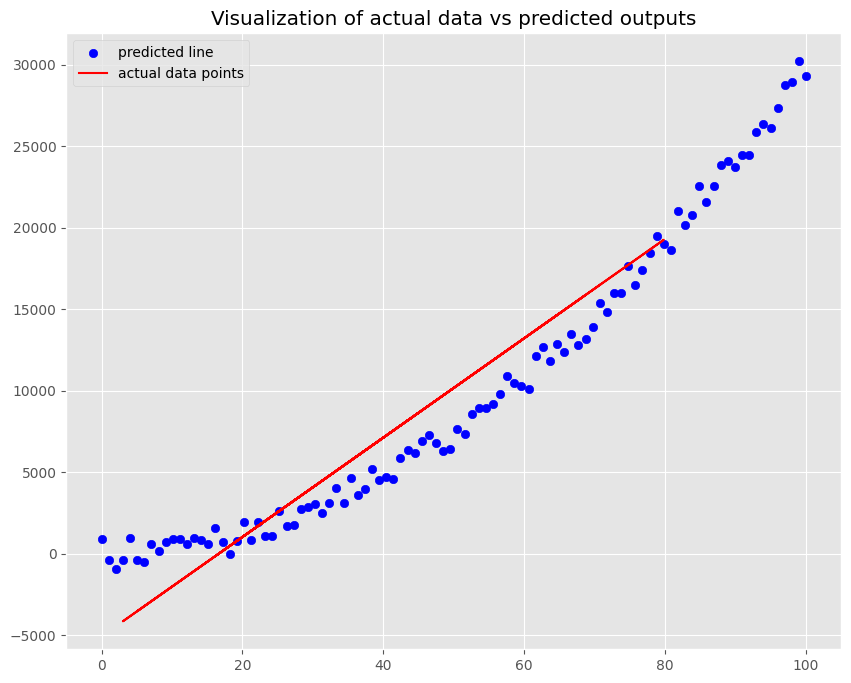

The RMSE for linear regression is: 2038.236355164779


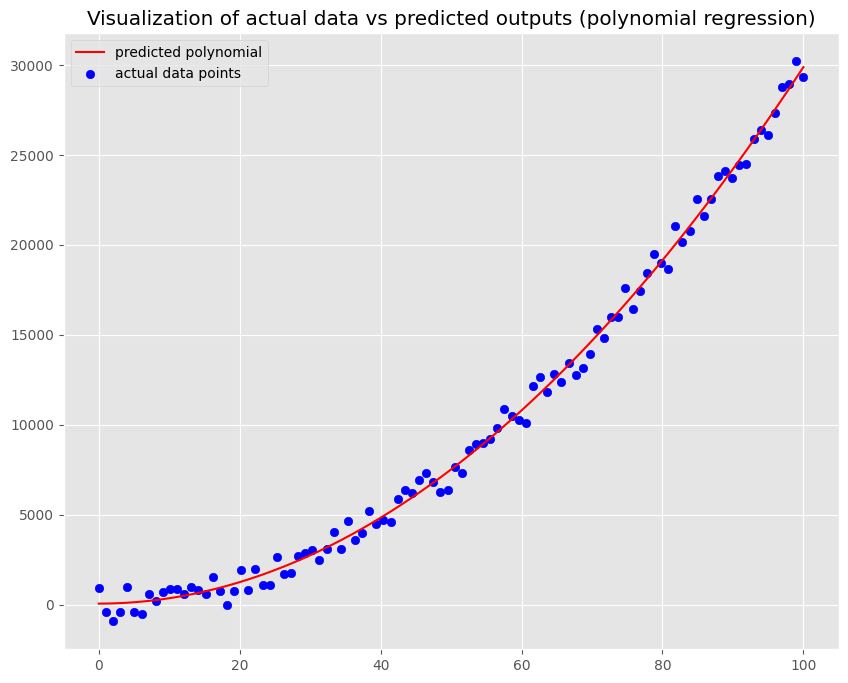

The RMSE for polynomial regression is: 571.1729138650257


In [9]:
lin_regression(x,y2)

poly_regression(x,y2,2)

## Applying linear regression to housing data

In [10]:
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Extract the relevant data and target values
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame from the extracted data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=column_names)

# Add a new column 'MEDV' to the DataFrame and assign the 'target' values to it
df['MEDV'] = target


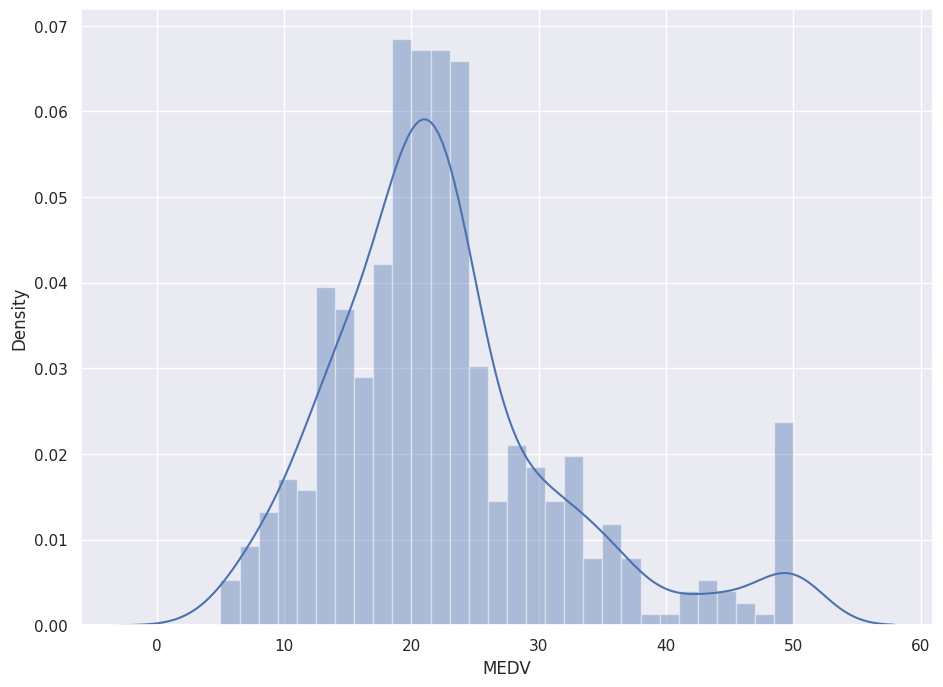

In [11]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

<Axes: >

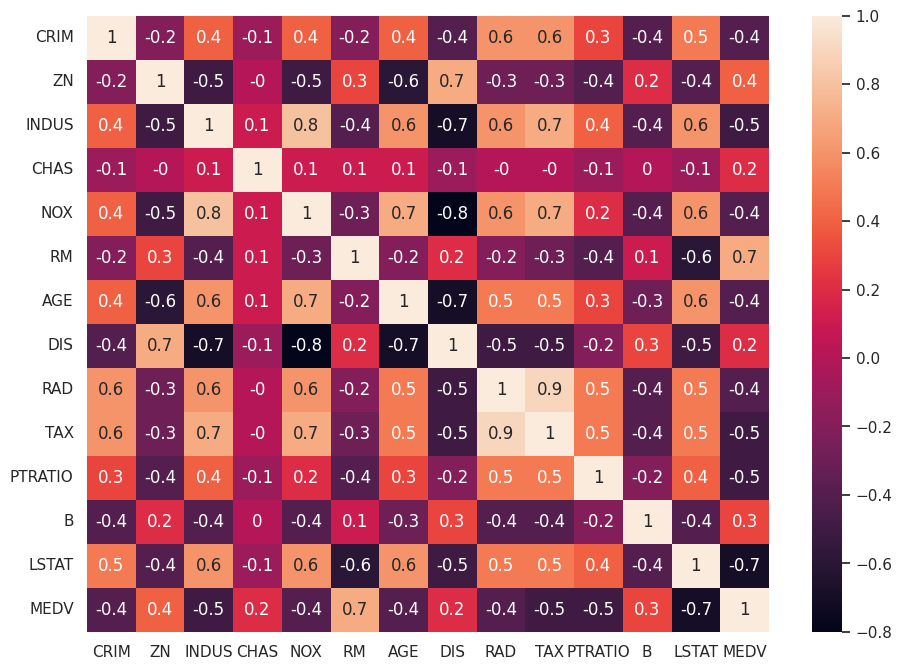

In [12]:
correlation_matrix = df.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

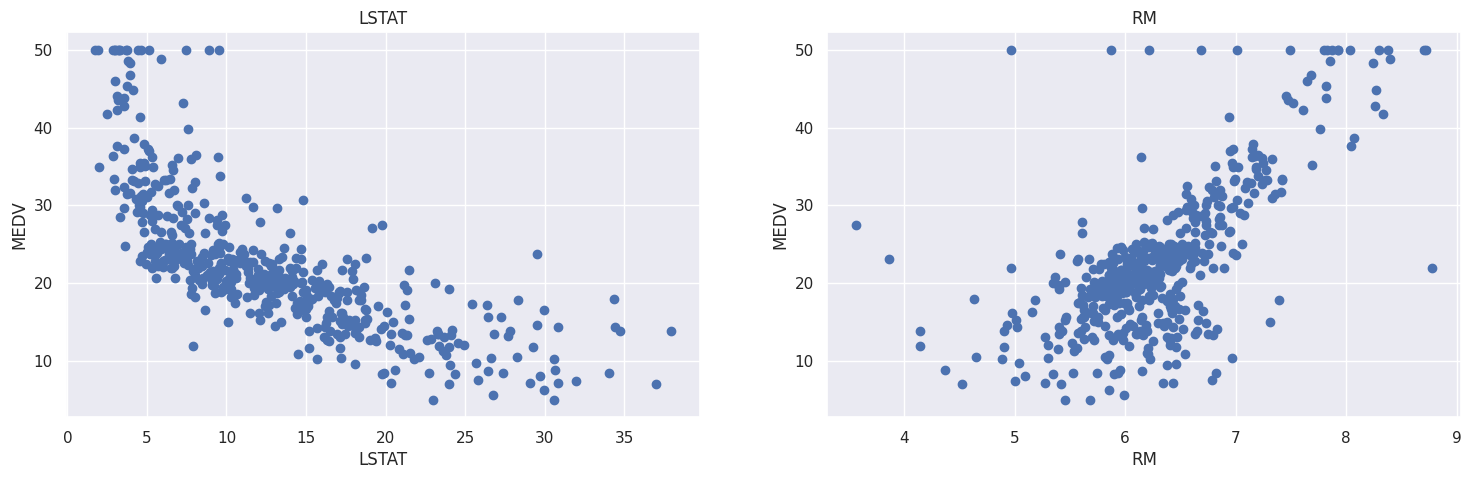

In [14]:
plt.figure(figsize=(18, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [15]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
y= df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)

print('Training data of RMSE is {}\n'.format(rmse))

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)

print('Testing data of RMSE is {}'.format(rmse))

Training data of RMSE is 5.637129335071195

Testing data of RMSE is 5.137400784702911


# Exercises

## Now, what if we took some non-linear noisy data, and fit a very high degree polynomial to it?

If you fit a very high-degree polynomial to non-linear noisy data, you may encounter several issues, commonly referred to as overfitting.

High Variance: The model's predictions can vary widely for different training datasets, indicating high variance. It may not capture the true underlying pattern but rather fits the noise.

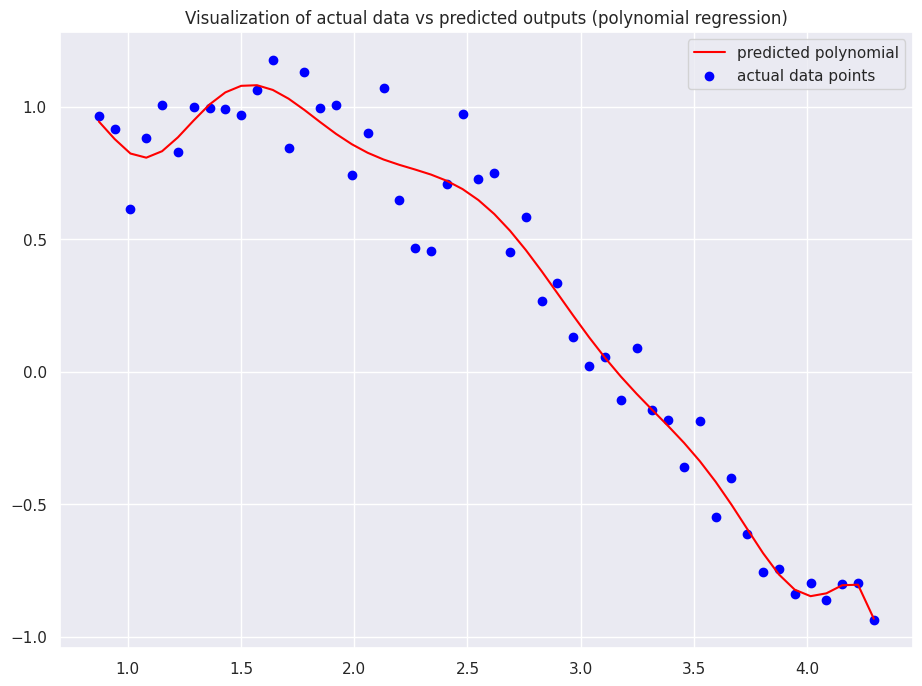

The RMSE for polynomial regression is: 0.1212861881927025


In [18]:
deg = 10#@param {type:"slider", min: 1, max:15, step:2}

np.random.seed(10)

X_ex = np.array([i*np.pi/180 for i in range(50,250,4)])
y_ex = np.sin(X_ex) + np.random.normal(0,0.15,len(X_ex))
poly_regression(X_ex,y_ex,deg)